# EDA Case Study
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading The Data

In [2]:
application_data = pd.read_csv(r'C:/Users/Ajay Bendale/OneDrive/Desktop/UpGrad/assignment case study/application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
previous_application = pd.read_csv(r'C:/Users/Ajay Bendale/OneDrive/Desktop/UpGrad/assignment case study/previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting Data

In [4]:
application_data.shape

(307511, 122)

In [5]:
previous_application.shape

(1670214, 37)

In [6]:
#Check the datatypes of all the columns of the dataframe
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#Check the datatypes of all the columns of the dataframe
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Missing Value for Application Data

In [8]:
#Check the number of null values in the columns
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Removing colums having more than 30% missing values

there are more missing values and some of the column are not usefull for us so we will drop that columns for reducing memory size.

In [9]:
emptycol=application_data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [10]:
emptycol = list(emptycol[emptycol.values>=0.3].index)
application_data.drop(labels=emptycol,axis=1,inplace=True)

In [11]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 58)

In [13]:
application_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [14]:
application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 58)

In [15]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwanted,axis=1,inplace=True)

In [16]:
application_data.shape

(252137, 28)

In [17]:
application_data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
dtype: int64

#### AMT_ANNUITY  impute missing values

In [18]:
application_data.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [19]:
application_data.AMT_ANNUITY.describe()

count    252125.000000
mean      27812.325168
std       14647.759104
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

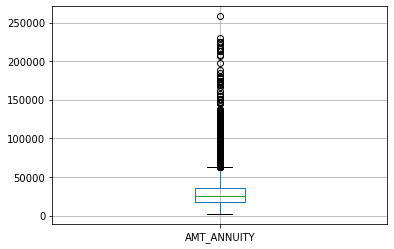

In [20]:
application_data.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [21]:
# from box plot it seems, it has lot of outliers so considering median measure
application_data.AMT_ANNUITY.median()

25834.5

In [22]:
application_data.AMT_ANNUITY.isnull().sum()

12

we can impute 24903(median) value in place of missing values

In [23]:
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(), inplace=True)

In [24]:
application_data.AMT_ANNUITY.isnull().sum()

0

### Binning of continuous variables

#### AMT_INCOME_TOTAL_bin

In [25]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_TOTAL_bin']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)


In [26]:
application_data.AMT_INCOME_TOTAL_bin.describe()

count            252137
unique               20
top       125000-150000
freq              39819
Name: AMT_INCOME_TOTAL_bin, dtype: object

In [27]:
application_data.AMT_INCOME_TOTAL_bin.isnull().sum()

0

In [28]:
application_data.AMT_INCOME_TOTAL_bin.value_counts()

125000-150000       39819
200000-225000       35994
100000-125000       34851
75000,100000        29612
150000-175000       29296
175000-200000       25892
50000-75000         12077
250000-275000       11485
225000-250000        6483
300000-325000        6169
350000-375000        4185
275000-300000        3749
425000-450000        2863
500000 and above     2543
25000-50000          1982
325000-350000        1952
400000-425000        1652
375000-400000        1132
475000-500000         282
450000-475000         119
0-25000                 0
Name: AMT_INCOME_TOTAL_bin, dtype: int64

#### AMT_CREDIT_bin

In [29]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_bin']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [30]:
application_data.AMT_CREDIT_bin.isnull().sum()

0

In [31]:
application_data.AMT_CREDIT_bin.value_counts()

900000 and above    50717
250000-300000       24961
500000-550000       18434
200000-250000       17502
400000-450000       15854
150000-200000       14867
0-150000            13502
300000-350000       13487
650000-700000       12142
450000-500000       11254
750000-800000        9770
550000-600000        9489
800000-850000        9439
850000-900000        9100
350000-400000        8399
600000-650000        7571
700000-750000        5649
Name: AMT_CREDIT_bin, dtype: int64

#### finding count of unique values in each column

In [32]:
application_data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
REG_REGION_NOT_LIVE_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_OWN_CAR                        2
NAME_CONTRACT_TYPE                  2
TARGET                              2
FLAG_OWN_REALTY                     2
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    7
CNT_CHILDREN                       15
AMT_CREDIT_bin                     17
AMT_INCOME_TOTAL_bin               20
HOUR_APPR_PROCESS_START            24
ORGANIZATION_TYPE                  57
REGION_POPULATION_RELATIVE         81
AMT_INCOME_TOTAL                 2266
AMT_CREDIT                       5331
DAYS_ID_PUBLISH                  6140
DAYS_EMPLOYED                   12573
AMT_ANNUITY 

##### CODE_GENDER having 3 values which is suspicious let's find

In [33]:
application_data['CODE_GENDER'].value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

here 4 XNA values so we will change it to F because F has majority

In [34]:
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [35]:
application_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   FLAG_OWN_CAR                 252137 non-null  object  
 5   FLAG_OWN_REALTY              252137 non-null  object  
 6   CNT_CHILDREN                 252137 non-null  int64   
 7   AMT_INCOME_TOTAL             252137 non-null  float64 
 8   AMT_CREDIT                   252137 non-null  float64 
 9   AMT_ANNUITY                  252137 non-null  float64 
 10  NAME_INCOME_TYPE             252137 non-null  object  
 11  NAME_EDUCATION_TYPE          252137 non-null  object  
 12  NAME_FAMILY_STATUS           252137 non-null

In [36]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data[numeric_columns]=application_data[numeric_columns].apply(pd.to_numeric)

In [37]:
application_data.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


In [38]:
# converting negative DAYS_BIRTH value to positive value
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()
# converting negative DAYS_EMPLOYED value to positive value
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].abs()
# converting negative DAYS_REGISTRATION value to positive value
application_data['DAYS_REGISTRATION']=application_data['DAYS_REGISTRATION'].abs()
# converting negative DAYS_ID_PUBLISH value to positive value
application_data['DAYS_ID_PUBLISH']=application_data['DAYS_ID_PUBLISH'].abs()
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


## lets check numerical columns for outliers

#### CNT_CHILDREN

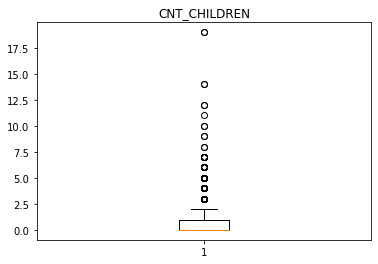

In [39]:
plt.boxplot(application_data['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()

In [40]:
application_data['CNT_CHILDREN'].describe()

count    252137.000000
mean          0.498515
std           0.763161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

The values greater than 2.5 are considered to be outliers
but values above 12.5 are not contineous so we can drop them

In [41]:
#Drop the above records
application_data= application_data[application_data['CNT_CHILDREN'] <= 12.5 ]

In [42]:
application_data['CNT_CHILDREN'].describe()

count    252133.000000
mean          0.498261
std           0.760436
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          12.000000
Name: CNT_CHILDREN, dtype: float64

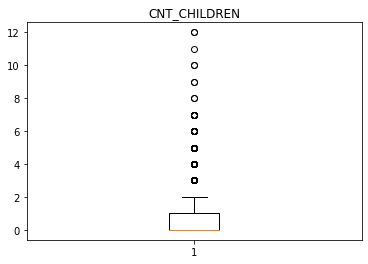

In [43]:
plt.boxplot(application_data['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()

In [44]:
#Drop the above records
application_data= application_data[application_data['CNT_CHILDREN'] <= 3 ]

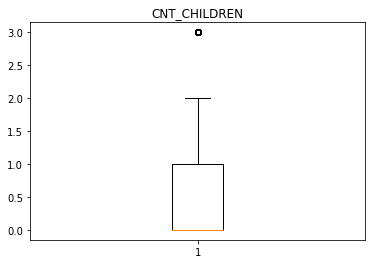

In [45]:
plt.boxplot(application_data['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()

In [46]:
application_data['CNT_CHILDREN'].describe()

count    251603.000000
mean          0.490117
std           0.738933
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: CNT_CHILDREN, dtype: float64

#### AMT_ANNUITY

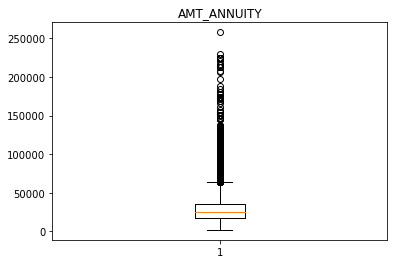

In [47]:
plt.boxplot(application_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

Population relative count greater than 60000.0 is considered to be an outlier but values above 200000 is not regular so we can drop them

In [48]:
#Drop the above records
application_data= application_data[application_data['AMT_ANNUITY'] <= 200000 ]

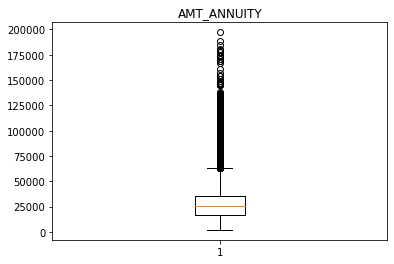

In [49]:
plt.boxplot(application_data['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

In [50]:
application_data['AMT_ANNUITY'].describe()

count    251571.000000
mean      27786.644275
std       14477.092517
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35615.250000
max      197230.500000
Name: AMT_ANNUITY, dtype: float64

#### 'REGION_POPULATION_RELATIVE'

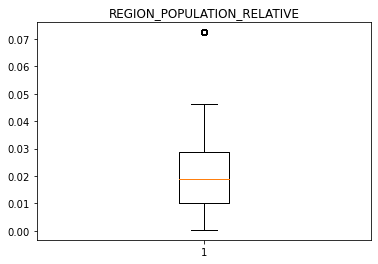

In [51]:
plt.boxplot(application_data['REGION_POPULATION_RELATIVE'])
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

Population relative count greater than 0.05 is considered to be an outlier we can drop them

In [52]:
#Drop the above records
application_data= application_data[application_data['REGION_POPULATION_RELATIVE'] <= 0.05 ]

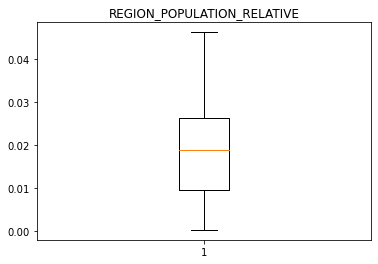

In [53]:
plt.boxplot(application_data['REGION_POPULATION_RELATIVE'])
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

In [54]:
application_data['REGION_POPULATION_RELATIVE'].describe()

count    244854.000000
mean          0.019478
std           0.011072
min           0.000290
25%           0.009657
50%           0.018801
75%           0.026392
max           0.046220
Name: REGION_POPULATION_RELATIVE, dtype: float64

## Univariate analysis

In [55]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


#### Checking the imbalance percentage.

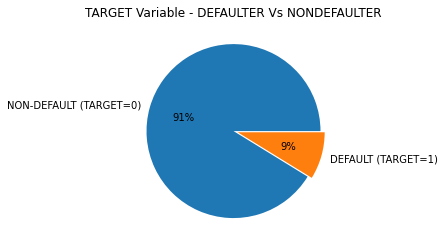

In [56]:
application_data['TARGET'].value_counts(normalize=True)*100
plt.pie(application_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

So this is not a balanced data set

In [57]:
# Divide the data into two sets, i.e., Target-1 and Target-0
application_data_1 = application_data[application_data['TARGET']==1] # Dataframe with all the data related to defaulters 
application_data_0 = application_data[application_data['TARGET']==0] # Dataframe with all the data related to non-defaulters

In [58]:
application_data_1.shape

(21493, 30)

In [59]:
application_data_0.shape

(223361, 30)

### for target=0(client with non-defaulters)

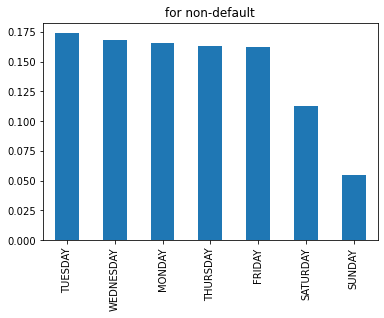

In [60]:
application_data_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for non-default')
plt.show()

from the graph we can conclude that application starting processes will be less in saturday and sunday.

In [61]:
# function to count plot for categorical variables
def univariate_analysis_application_data(df,col,title,hue =None):    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30   
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(application_data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = application_data, x= col, order=application_data[col].value_counts().index,hue = hue,palette='magma')        
    plt.show()

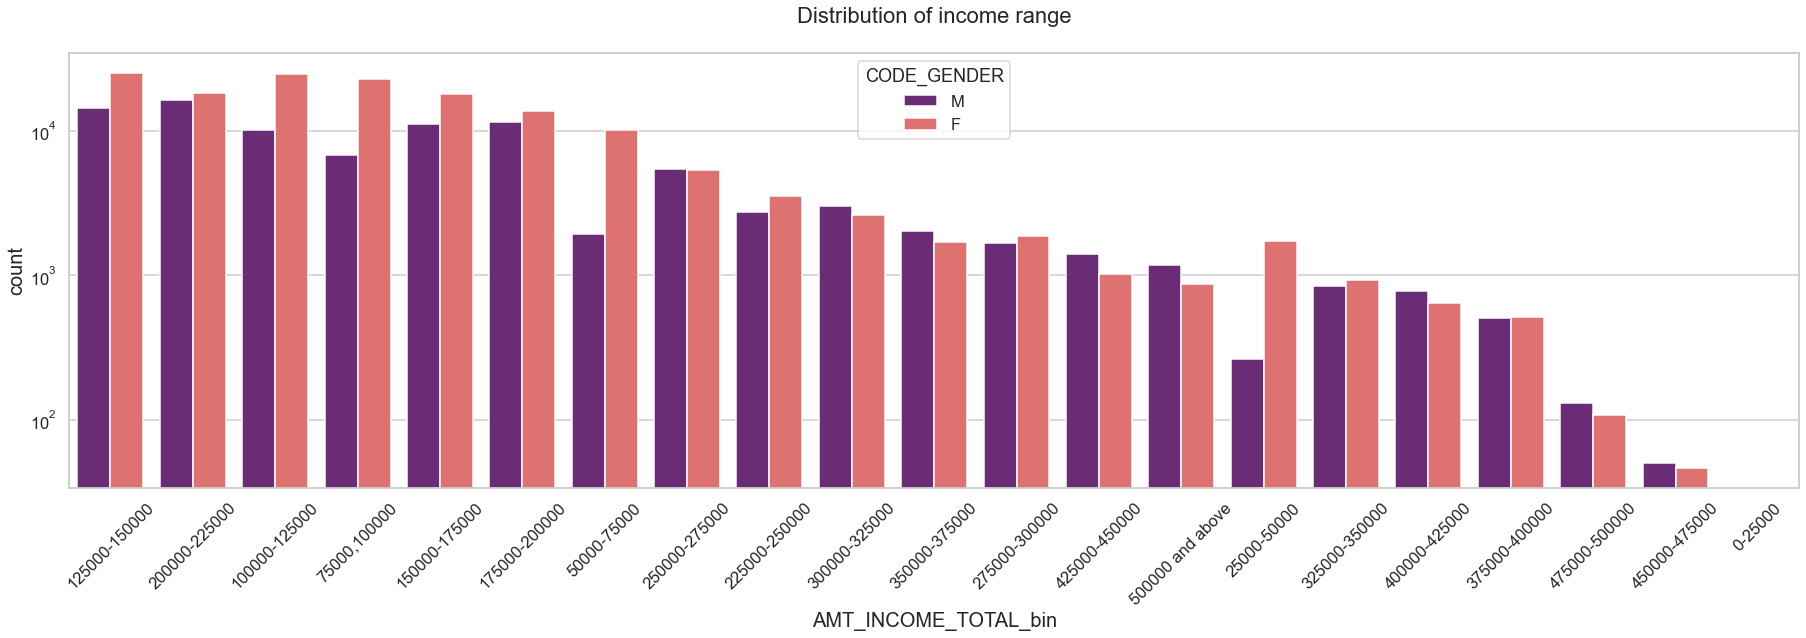

In [62]:
# PLotting for income range
univariate_analysis_application_data(application_data_0,col='AMT_INCOME_TOTAL_bin',title='Distribution of income range',hue='CODE_GENDER')

    1.Female counts are higher than male.
    2.Income range upto 200000 is having more number of credits.
    3.This graph show that females are more than male in having credits for that range.
    4.Very less count for income range 400000 and above.

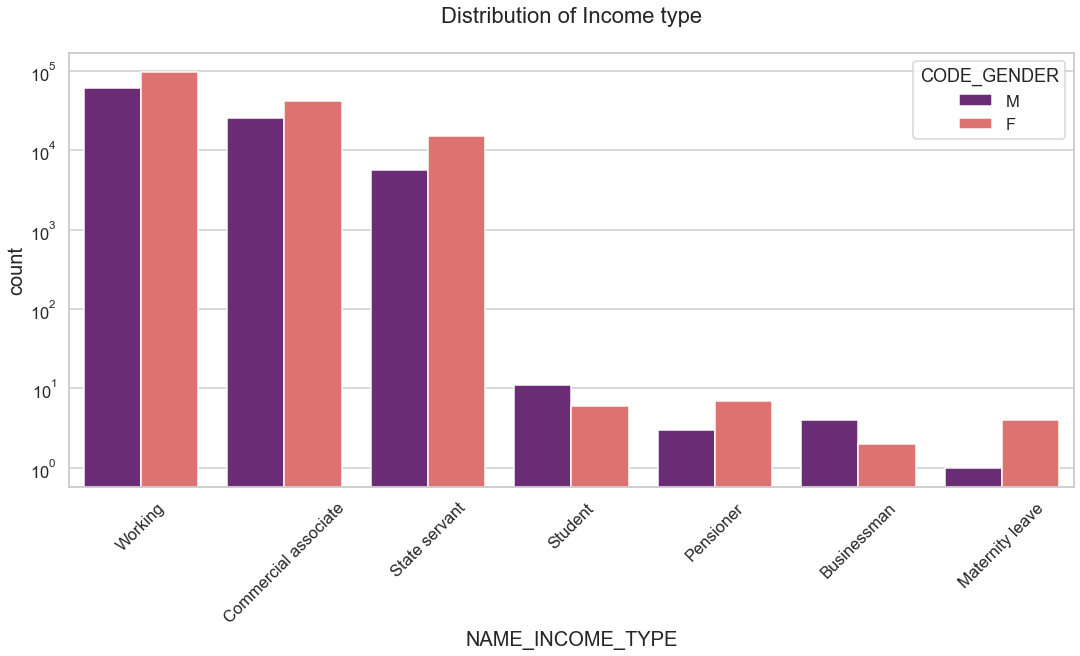

In [63]:
# Plotting for Income type
univariate_analysis_application_data(application_data_0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

    1.For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
    2.For this Females are having more number of credits than male.

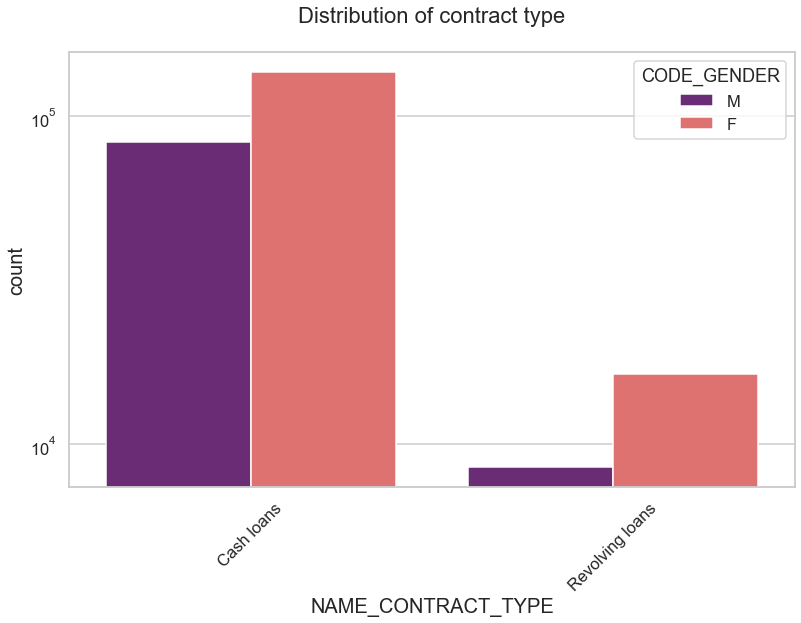

In [64]:
# Plotting for Contract type
univariate_analysis_application_data(application_data_0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

    For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
    For this also Female is leading for applying credits.

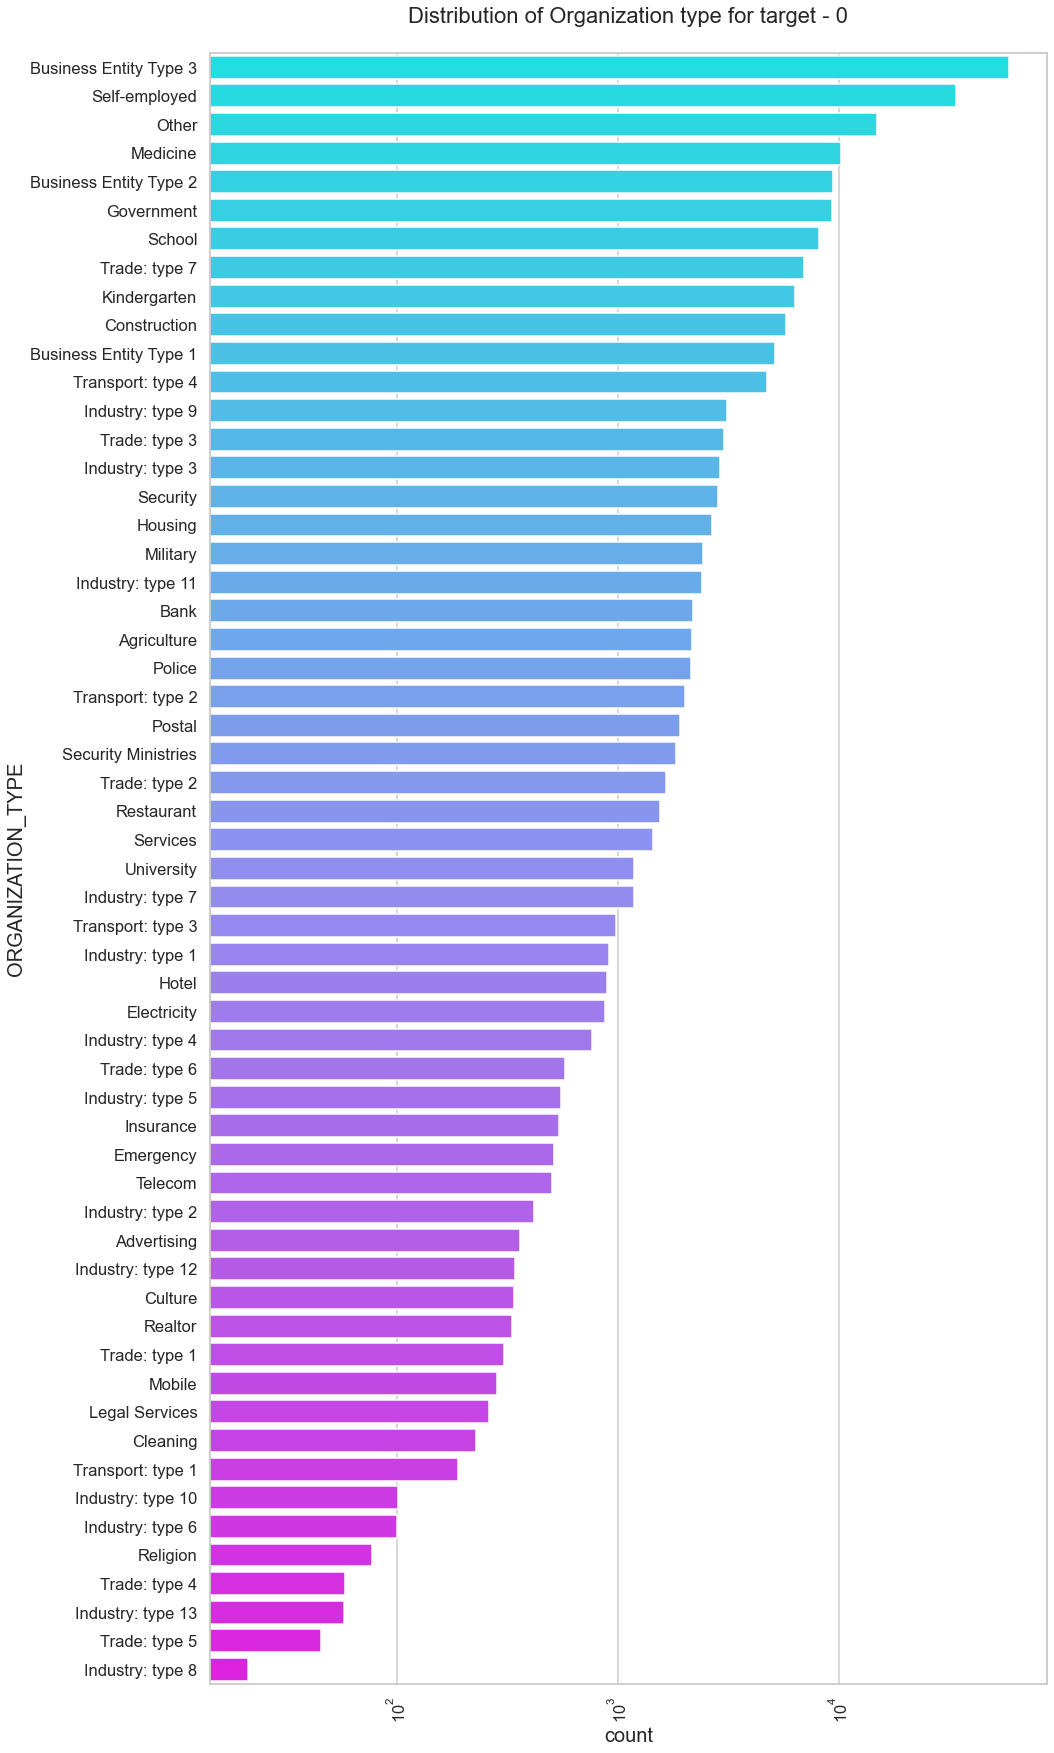

In [65]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=application_data_0,y='ORGANIZATION_TYPE',order=application_data_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ and ‘Medicine’.

### for target=1(client with defaulters)

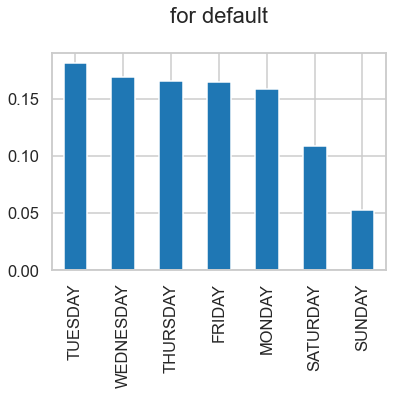

In [66]:
application_data_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('for default')
plt.show()

from the graph we can conclude that application starting processes will be less in saturday and sunday.

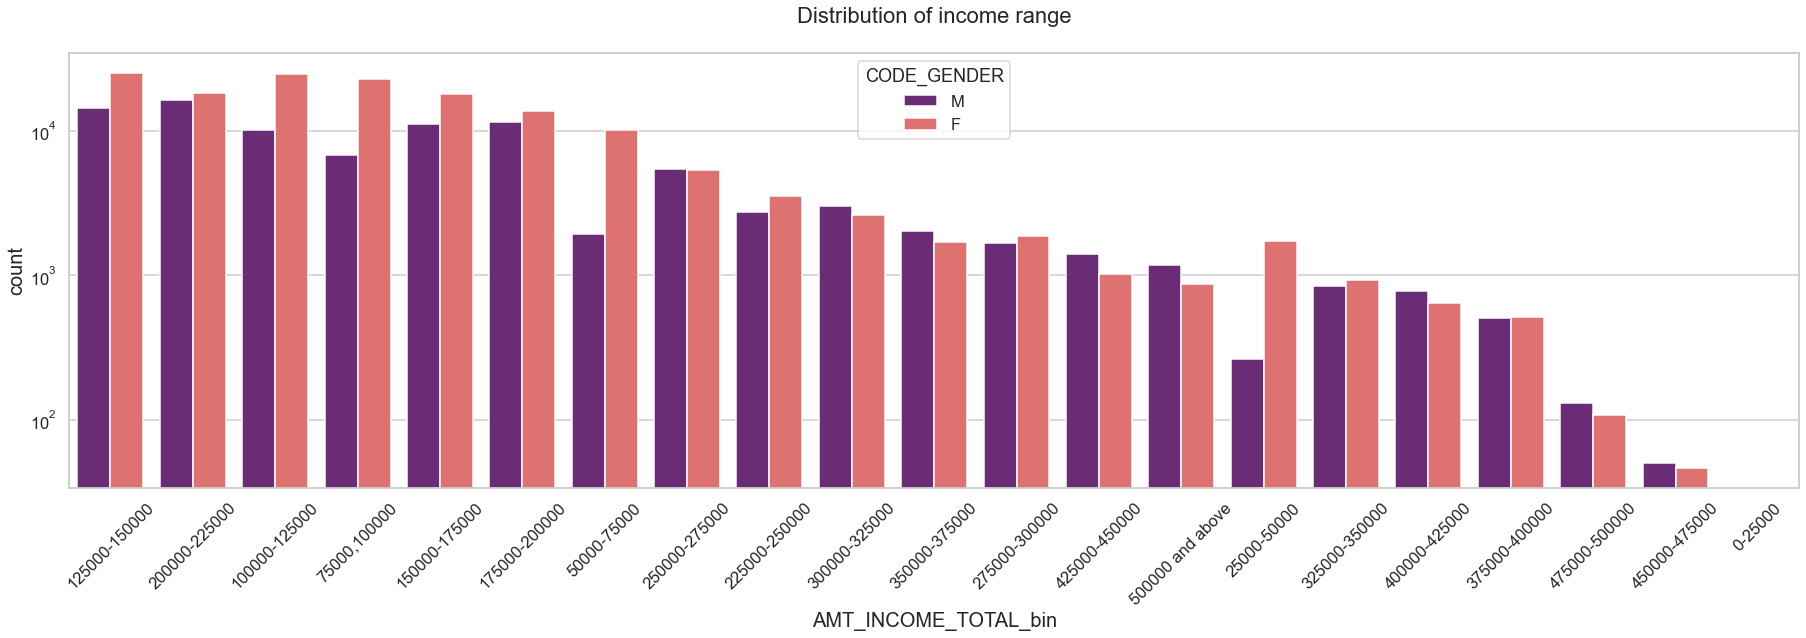

In [67]:
# PLotting for income range
univariate_analysis_application_data(application_data_1,col='AMT_INCOME_TOTAL_bin',title='Distribution of income range',hue='CODE_GENDER')

    1.Income range upto 200000 is having more number of credits.
    2.Very less count for income range 400000 and above.

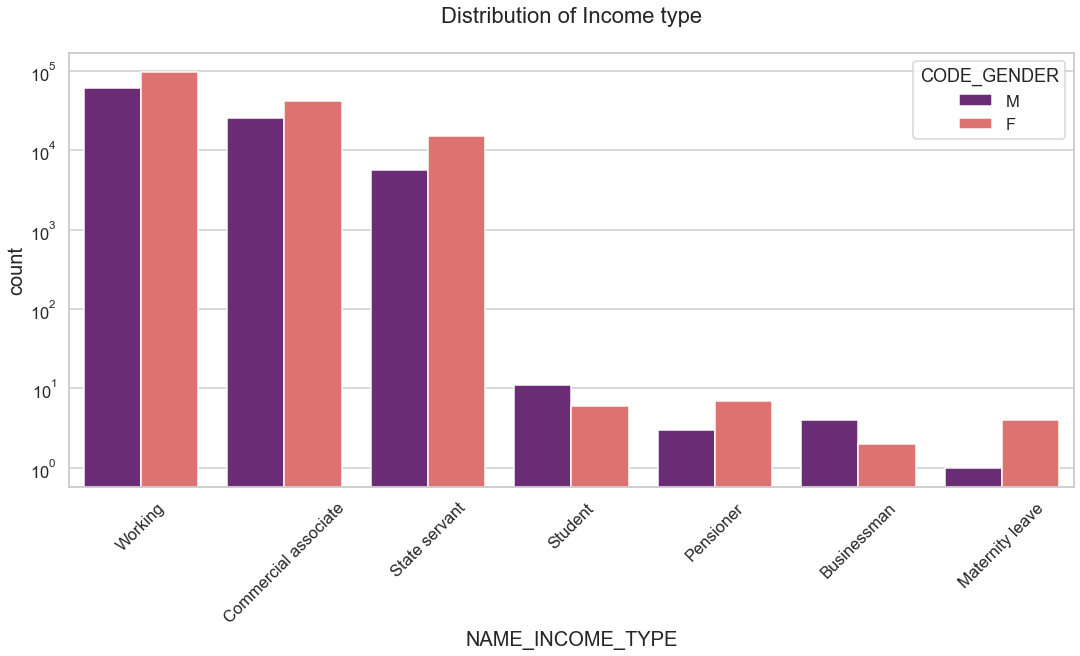

In [68]:
# Plotting for Income type
univariate_analysis_application_data(application_data_1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

    1.For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
    2.For this Females are having more number of credits than male.
    3.Less number of credits for income type ‘Maternity leave’.

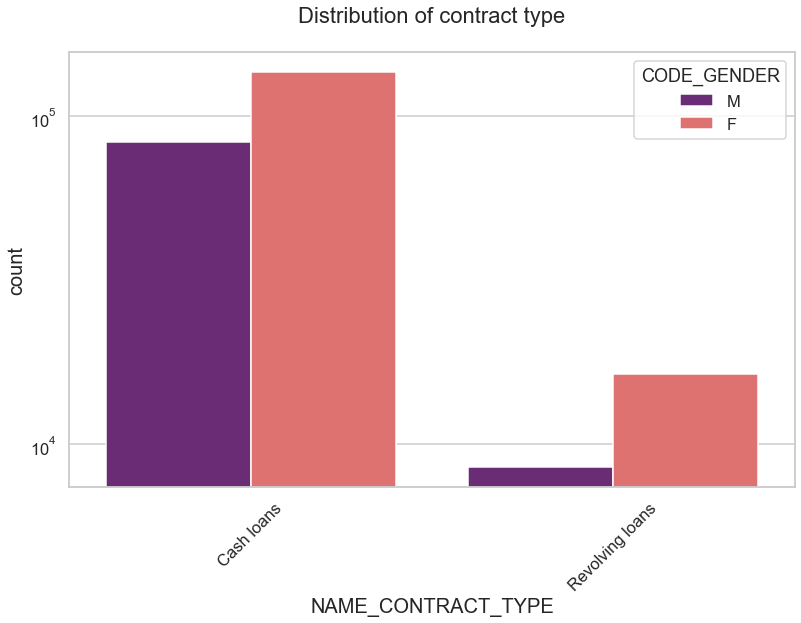

In [69]:
# Plotting for Contract type
univariate_analysis_application_data(application_data_1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

    1.For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
    2.For this also Female is leading for applying credits.

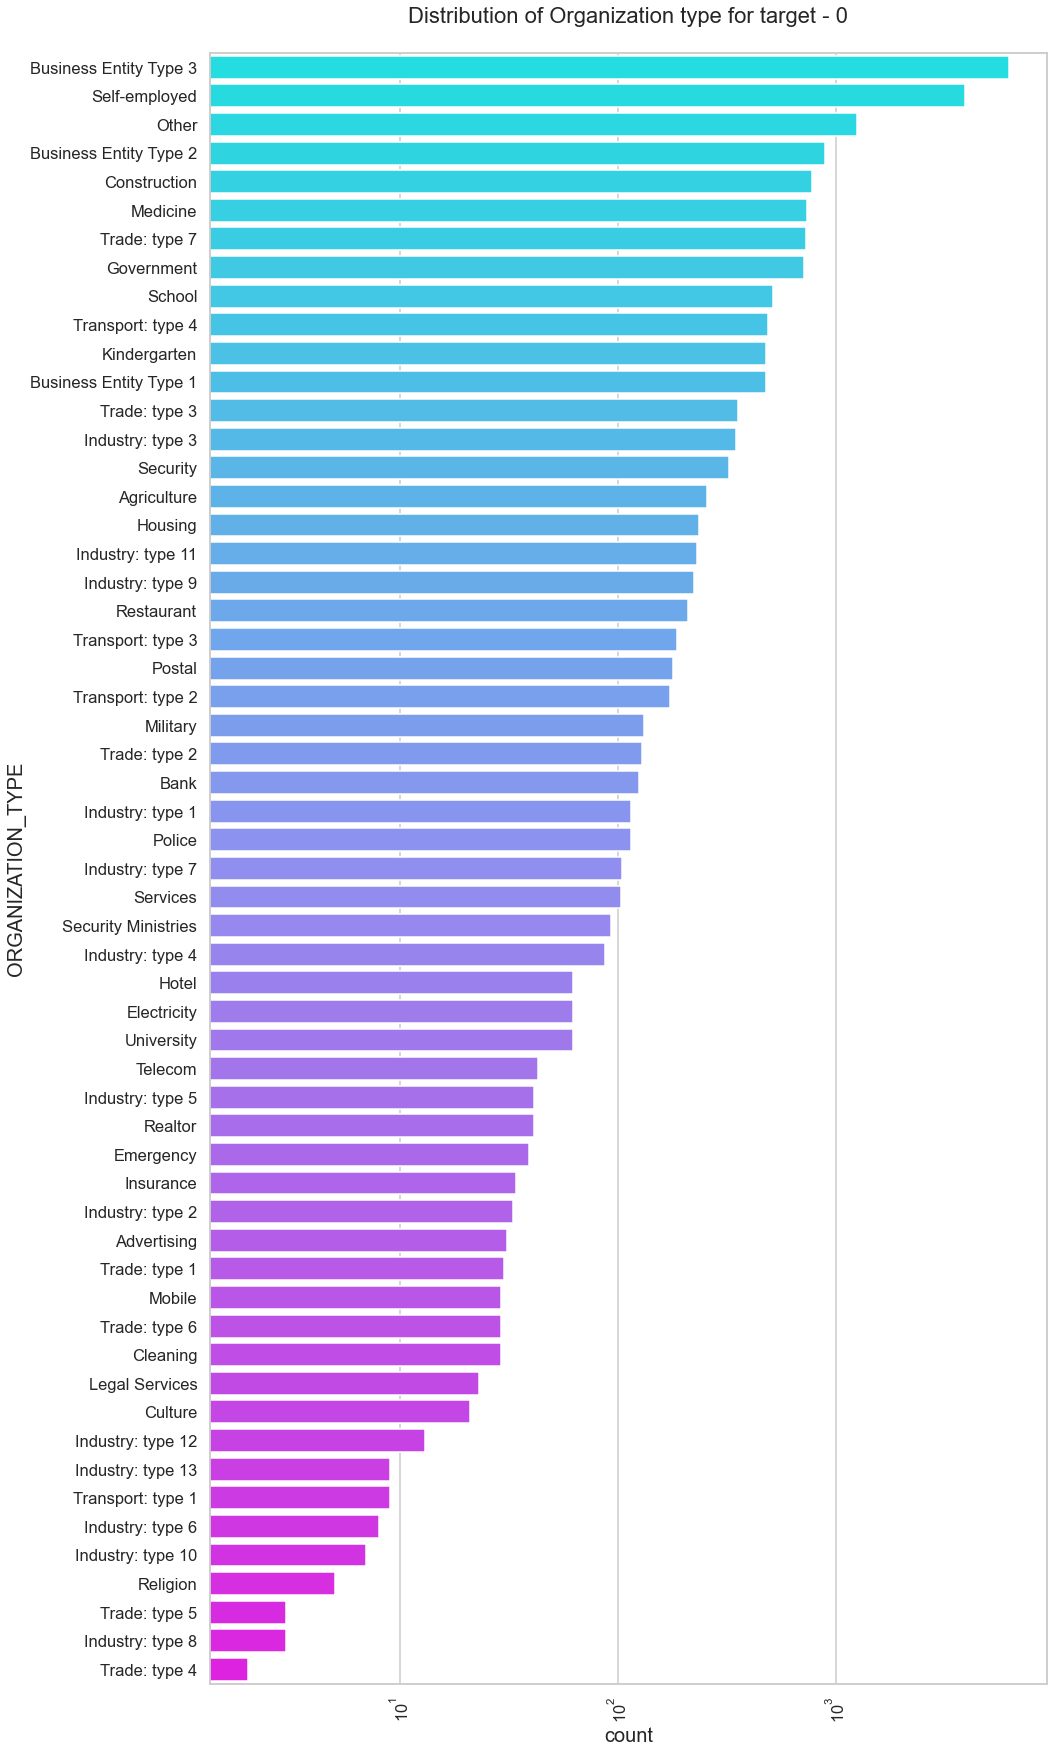

In [70]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=application_data_1,y='ORGANIZATION_TYPE',order=application_data_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ and ‘Medicine’.

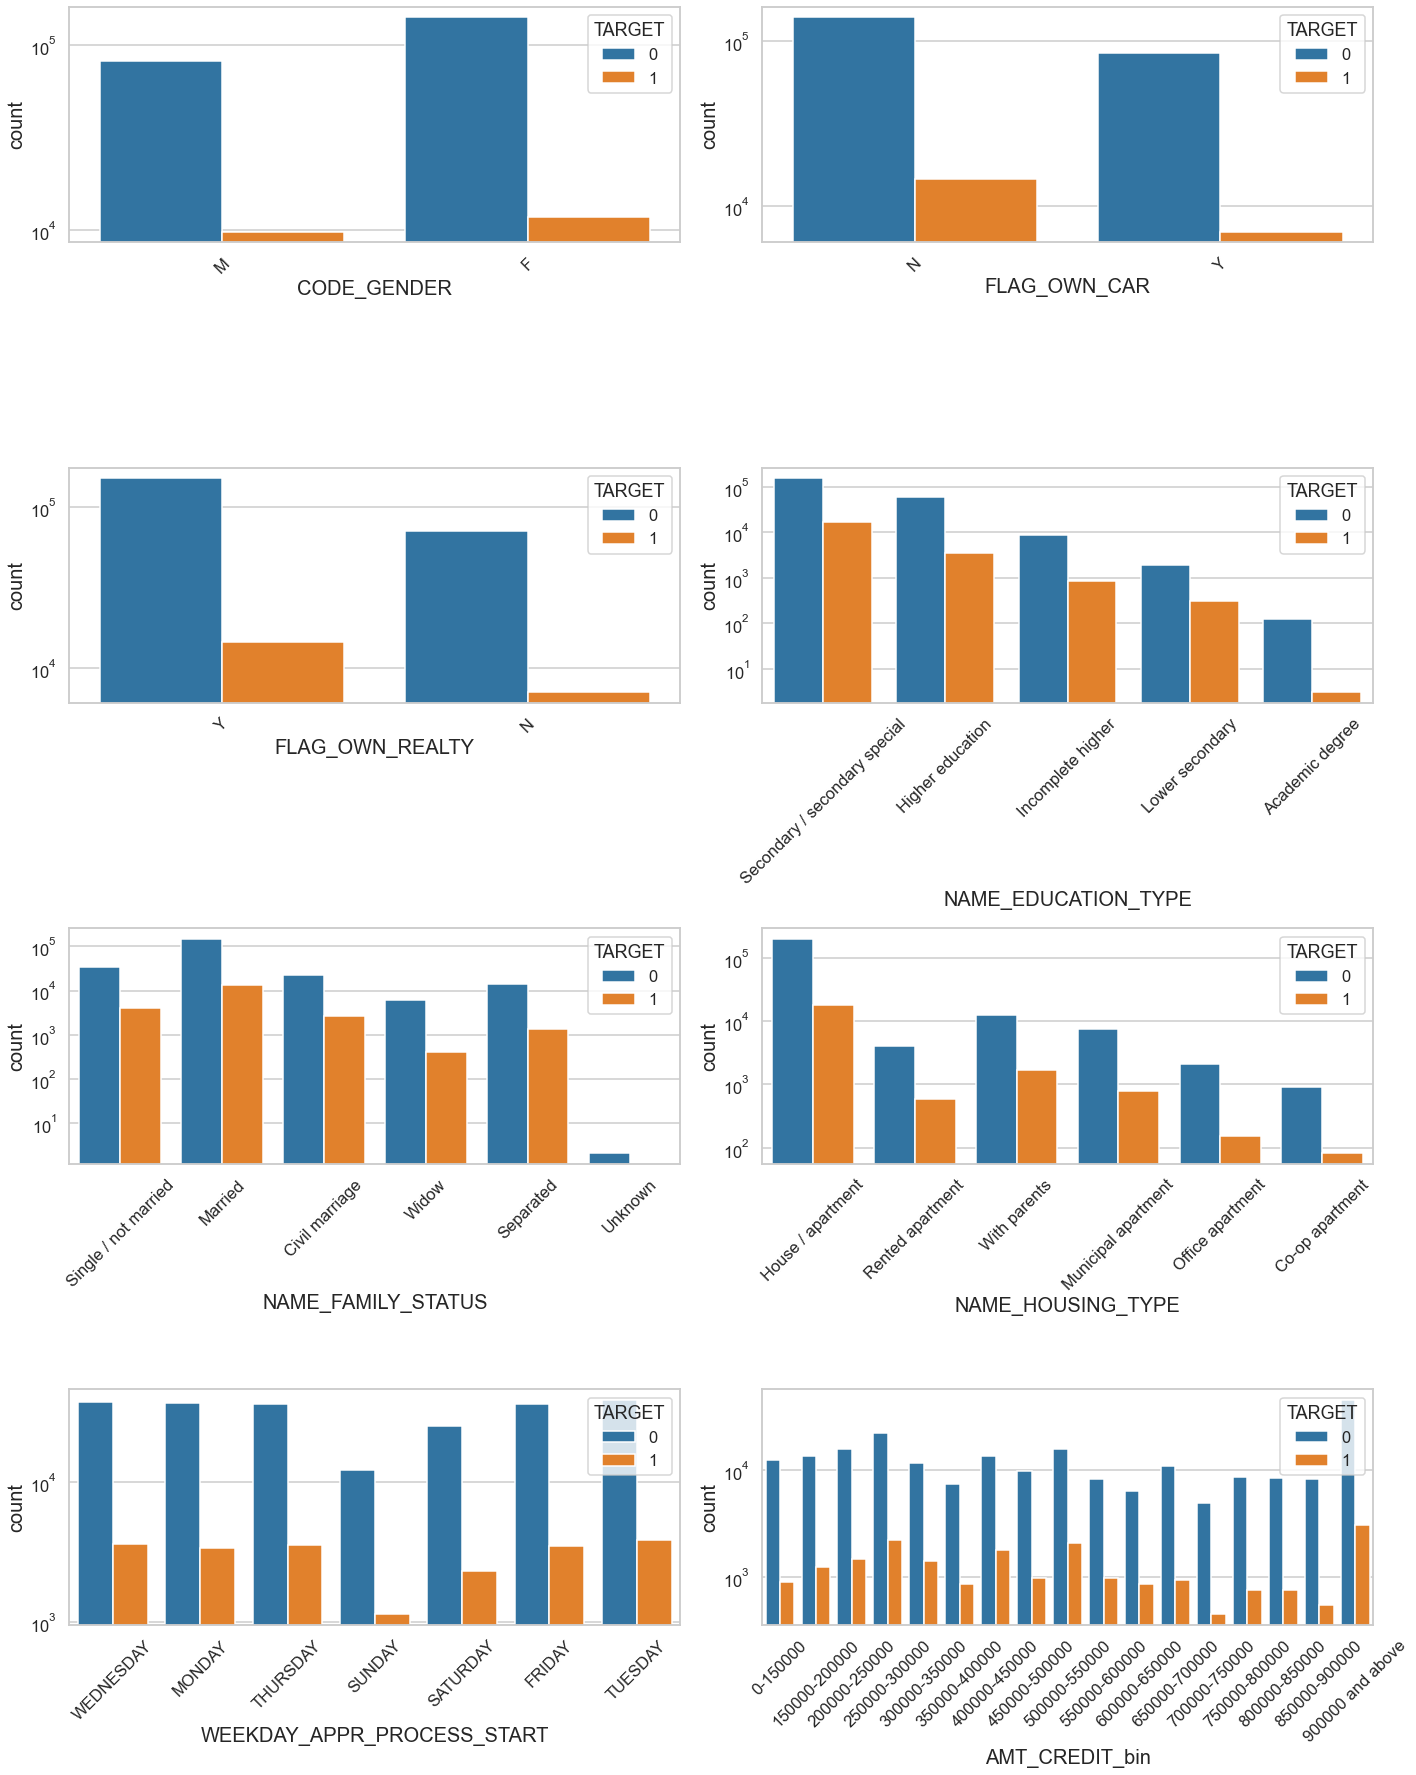

In [71]:
categorical_columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bin']

plt.figure(figsize=(20,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=application_data)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

    1.People who started application process on sunday are less likely to default
    2.Saturday and sunday are less busy for bank in terms of loan applications
    3.People with house or appartment tend to take more loans
    4.We can say more married people tend to take more Loan as compaired to other categories
    5.we can conclude that secondary/special educated people are applying loans in high in number
    6.People who don't own a car tends to take more loans
    7.Female tends to take more loans

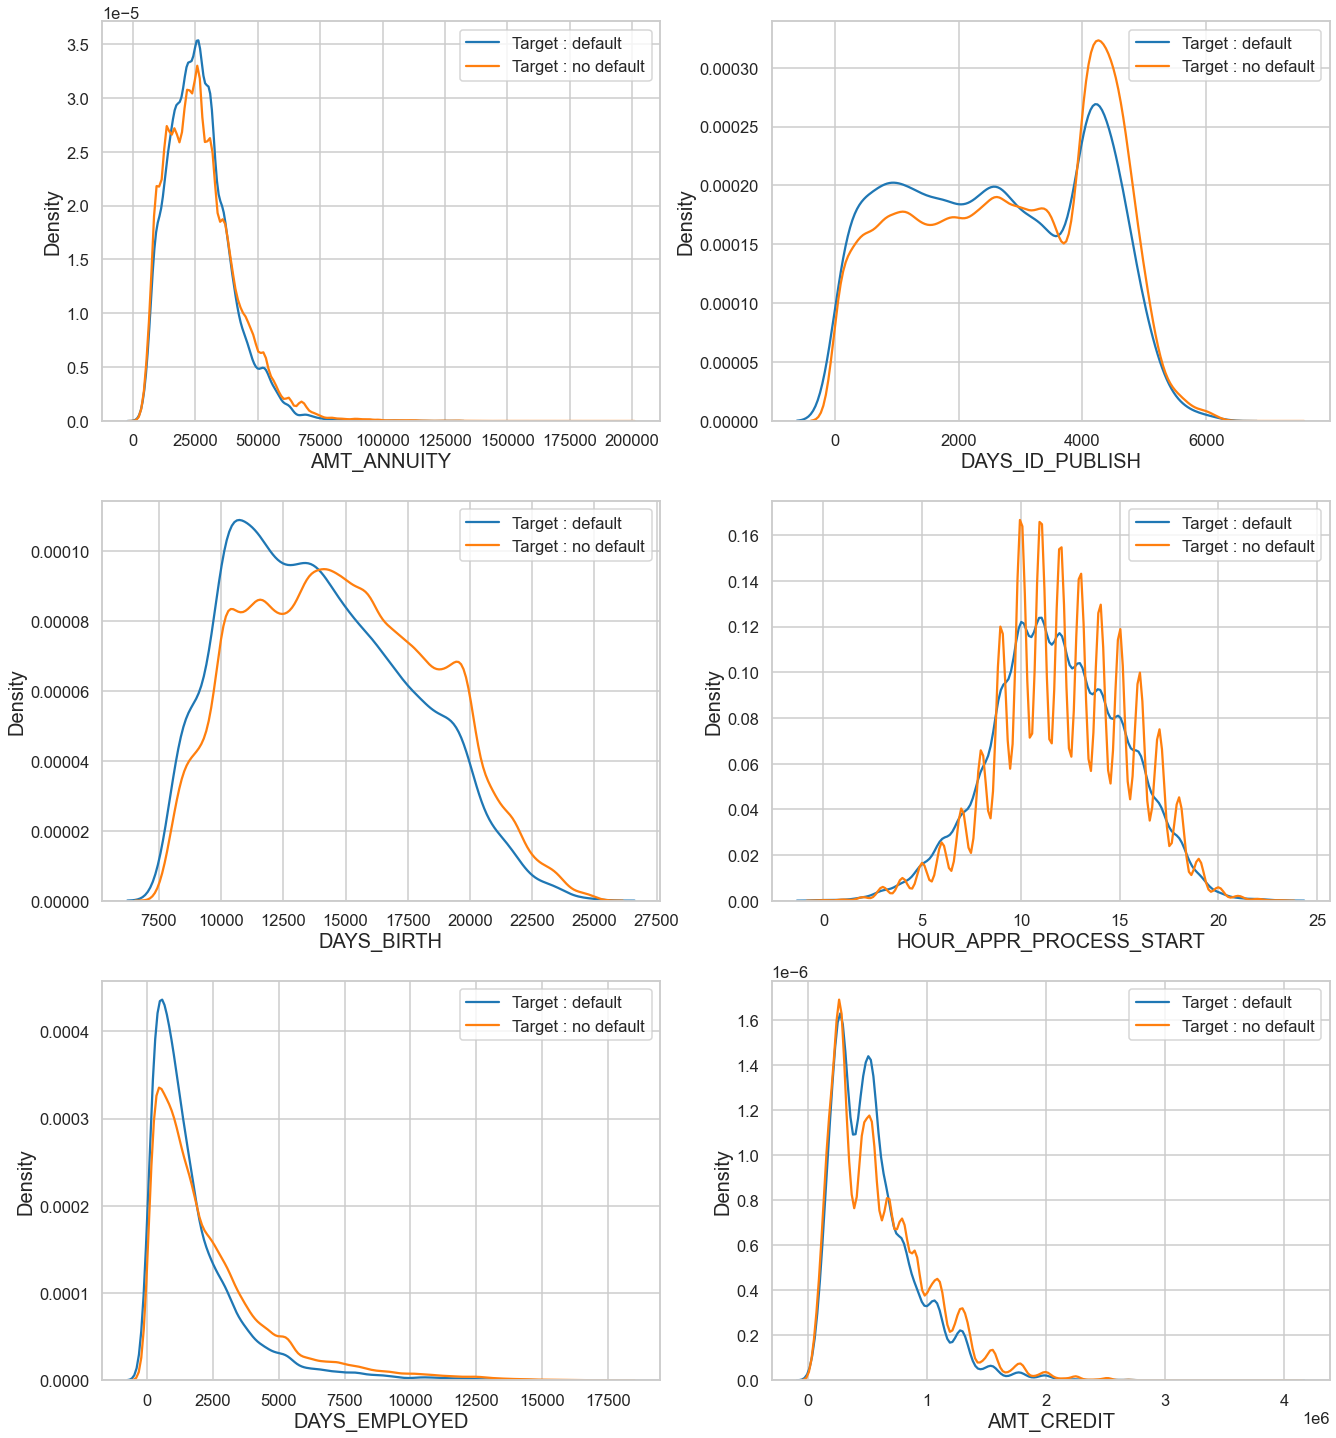

In [72]:
continous_columns=['AMT_ANNUITY','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(application_data_1[i[1]].dropna(),hist=False,label='Target : default')
    sns.distplot(application_data_0[i[1]].dropna(),hist=False,label='Target : no default')
    plt.legend()
plt.show()    

    1.People with lower total income are more likely to default
    2.People who just got employed tends to take more loans
    3.People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans
    4.People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans
    5.low amount annuity has high number of loans

### Correlation

In [73]:
application_data_0_corr=application_data_0.iloc[0:,2:]
application_data_1_corr=application_data_1.iloc[0:,2:]

target0=application_data_0_corr.corr(method='spearman')
target1=application_data_1_corr.corr(method='spearman')

In [74]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.020205,-0.023592,-0.010519,-0.026836,-0.269067,-0.031825,-0.156112,0.119907,-0.029268,-0.023869,-0.016280,-0.005914,0.002059,0.005625,0.011617
AMT_INCOME_TOTAL,-0.020205,1.000000,0.399658,0.466367,0.065147,0.052482,0.062553,-0.048812,0.039053,0.058119,0.076100,0.161815,0.147897,0.005610,0.000835,0.006528
AMT_CREDIT,-0.023592,0.399658,1.000000,0.826560,0.040761,0.168549,0.105020,0.012256,0.039743,0.030041,0.012741,0.041055,0.043267,-0.038652,-0.031094,-0.006340
AMT_ANNUITY,-0.010519,0.466367,0.826560,1.000000,0.038014,0.099121,0.075495,-0.015145,0.028886,0.023615,0.031649,0.070936,0.067850,-0.016690,-0.016026,-0.001623
REGION_POPULATION_RELATIVE,-0.026836,0.065147,0.040761,0.038014,1.000000,0.039634,0.001402,0.029928,0.013298,0.111306,-0.038154,0.027528,0.049702,-0.040954,-0.011412,0.011241
DAYS_BIRTH,-0.269067,0.052482,0.168549,0.099121,0.039634,1.000000,0.308422,0.265396,0.084493,-0.052704,-0.060962,-0.039273,-0.013540,-0.170018,-0.112292,-0.027971
DAYS_EMPLOYED,-0.031825,0.062553,0.105020,0.075495,0.001402,0.308422,1.000000,0.127531,0.106835,-0.025793,-0.066965,-0.087922,-0.064189,-0.120602,-0.129116,-0.071314
DAYS_REGISTRATION,-0.156112,-0.048812,0.012256,-0.015145,0.029928,0.265396,0.127531,1.000000,0.036285,0.025532,-0.019250,-0.015556,-0.008197,-0.036590,-0.043257,-0.023781
DAYS_ID_PUBLISH,0.119907,0.039053,0.039743,0.028886,0.013298,0.084493,0.106835,0.036285,1.000000,-0.007573,-0.028972,-0.021261,-0.008055,-0.056703,-0.034667,-0.001873
HOUR_APPR_PROCESS_START,-0.029268,0.058119,0.030041,0.023615,0.111306,-0.052704,-0.025793,0.025532,-0.007573,1.000000,0.051309,0.068198,0.052844,0.015397,0.002822,-0.004118


In [75]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.036320,0.002631,0.016788,-0.025393,-0.176655,-0.007077,-0.107781,0.091052,-0.040265,-0.036769,-0.041288,-0.027532,-0.016607,-0.008273,0.007163
AMT_INCOME_TOTAL,-0.036320,1.000000,0.361946,0.426315,0.038360,0.102082,0.054295,-0.016304,0.051551,0.071252,0.074658,0.156924,0.145148,0.000026,0.000788,0.008918
AMT_CREDIT,0.002631,0.361946,1.000000,0.812644,0.033278,0.200392,0.108032,0.018513,0.064866,0.018624,0.014324,0.031436,0.032401,-0.029057,-0.029319,-0.010145
AMT_ANNUITY,0.016788,0.426315,0.812644,1.000000,0.016294,0.100160,0.060879,-0.023455,0.044048,0.015028,0.029148,0.059692,0.057660,-0.008891,-0.011575,-0.000255
REGION_POPULATION_RELATIVE,-0.025393,0.038360,0.033278,0.016294,1.000000,0.041232,0.014131,0.024588,0.018652,0.098704,-0.035010,-0.011924,0.006465,-0.050991,-0.032725,-0.005708
DAYS_BIRTH,-0.176655,0.102082,0.200392,0.100160,0.041232,1.000000,0.256477,0.191501,0.146981,-0.043947,-0.046961,-0.024905,-0.003197,-0.146842,-0.096257,-0.008754
DAYS_EMPLOYED,-0.007077,0.054295,0.108032,0.060879,0.014131,0.256477,1.000000,0.085673,0.104831,-0.011735,-0.070264,-0.083394,-0.056309,-0.120407,-0.141302,-0.069593
DAYS_REGISTRATION,-0.107781,-0.016304,0.018513,-0.023455,0.024588,0.191501,0.085673,1.000000,0.062720,0.041440,-0.005791,-0.002175,-0.000713,-0.013625,-0.035259,-0.023191
DAYS_ID_PUBLISH,0.091052,0.051551,0.064866,0.044048,0.018652,0.146981,0.104831,0.062720,1.000000,-0.014088,-0.025033,-0.013072,-0.002054,-0.049481,-0.015935,0.016086
HOUR_APPR_PROCESS_START,-0.040265,0.071252,0.018624,0.015028,0.098704,-0.043947,-0.011735,0.041440,-0.014088,1.000000,0.051008,0.063464,0.048916,0.006005,0.009887,0.006060


In [76]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data,annot=False)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

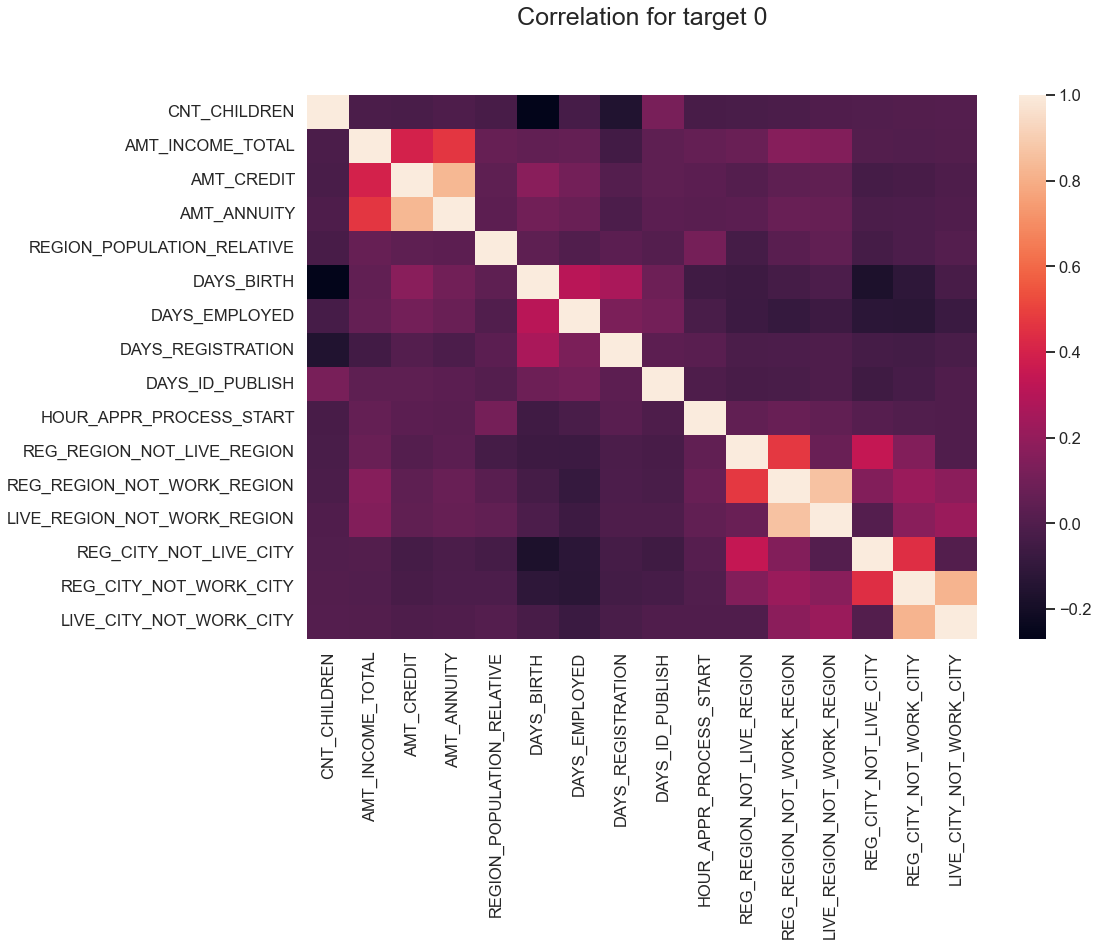

In [77]:
targets_corr(data=target0,title='Correlation for target 0')

    1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
    2.Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
    3.Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
    4.less children client have in densely populated area.
    5.Credit amount is higher to densely populated area.
    6.The income is also higher in densely populated area.

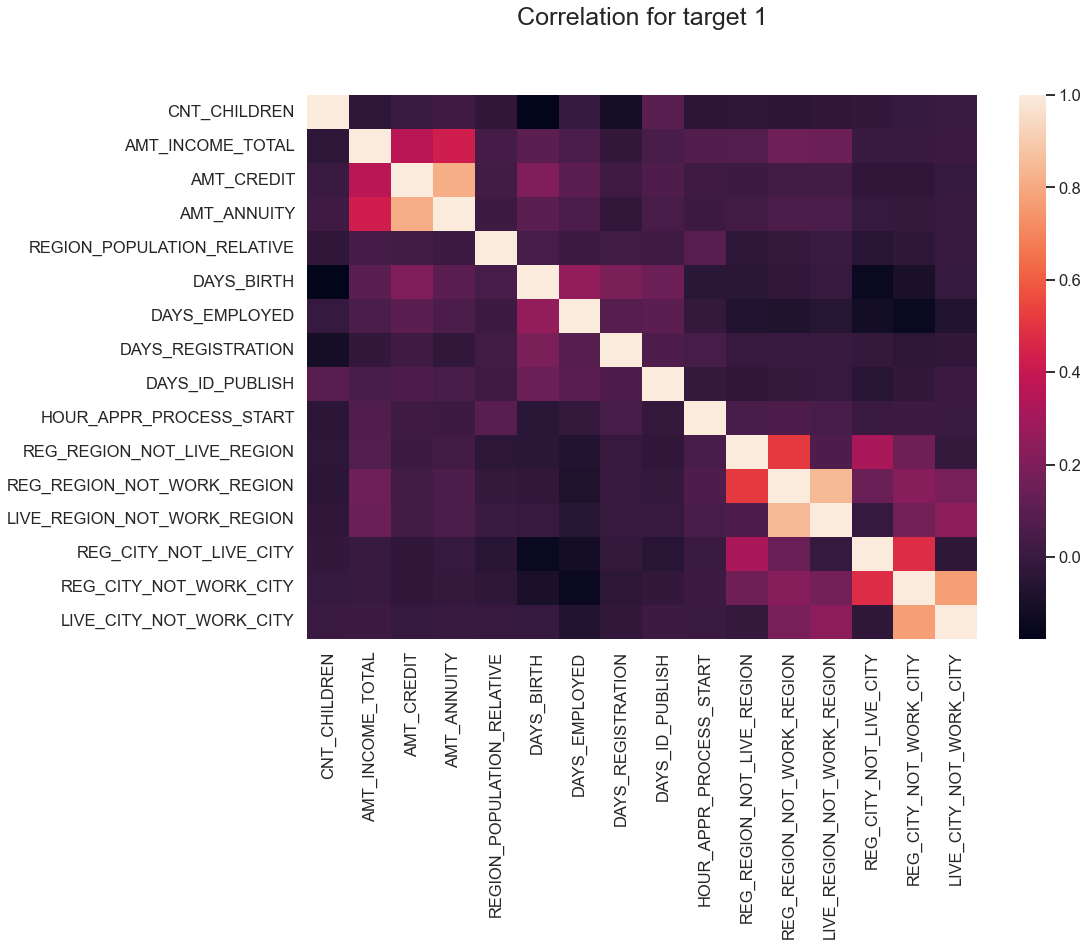

In [78]:
targets_corr(data=target1,title='Correlation for target 1')

    1.This heat map for Target 1 is also having quite a same observation just like Target 0. 
    2.The client's permanent address does not match contact address are having less children and vice-versa
    3.the client's permanent address does not match work address are having less children and vice-versa

## Bivariate Analysis

##### for target=0

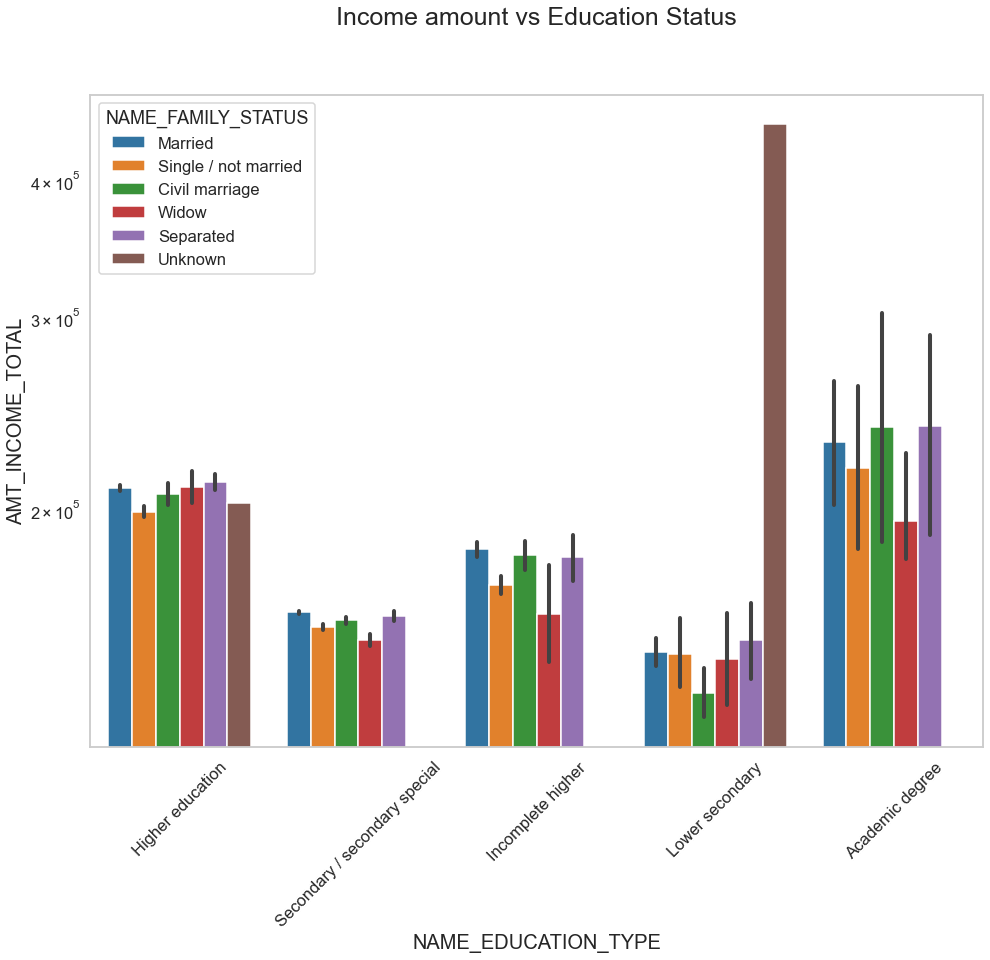

In [79]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =application_data_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()


From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

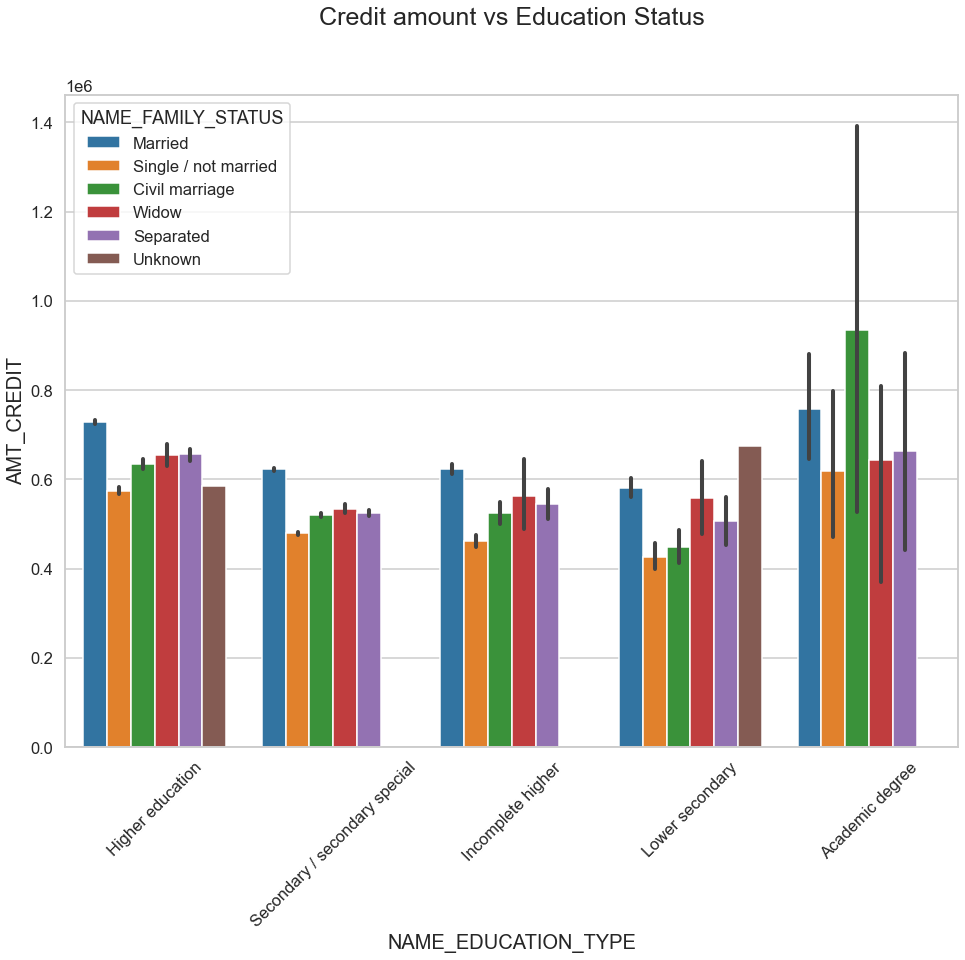

In [80]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =application_data_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

##### for target=1

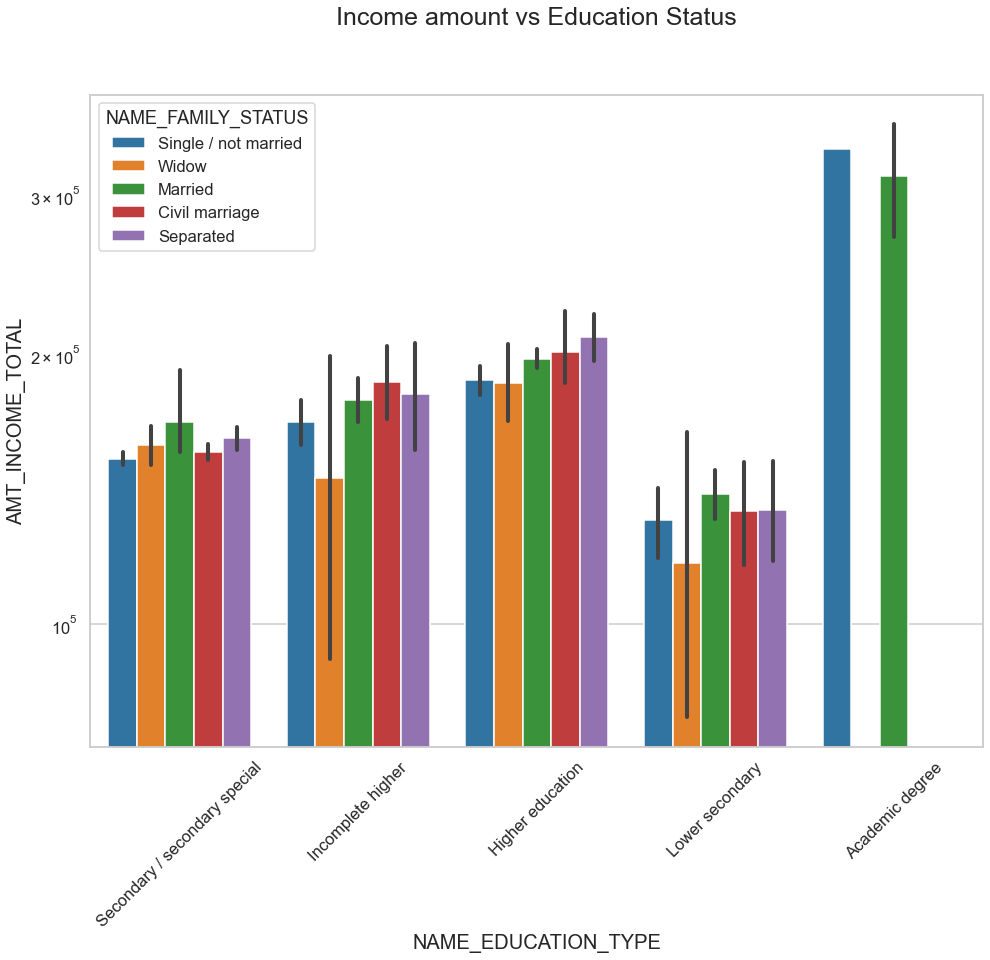

In [81]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =application_data_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

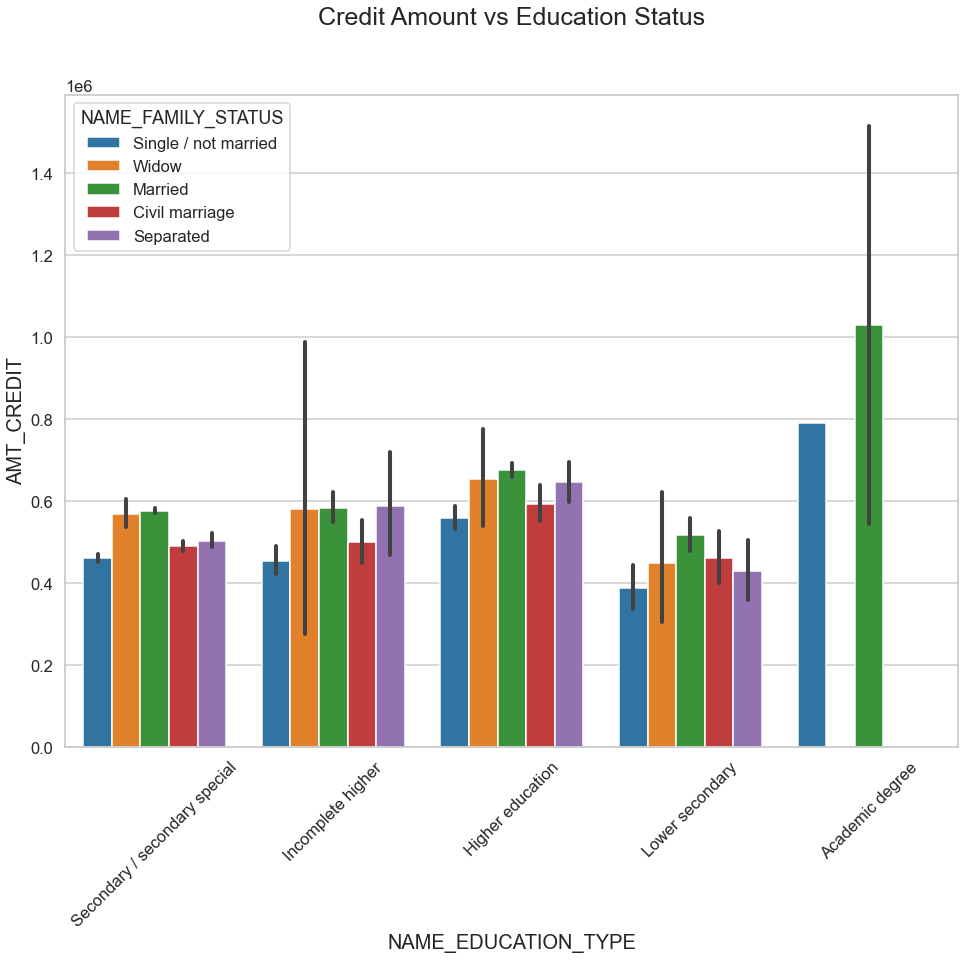

In [82]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =application_data_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

## Cleaning the missing data from the dataset of previous application

In [83]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
previous_application.shape

(1670214, 37)

In [85]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [86]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [87]:
emptycol1=previous_application.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [88]:
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
previous_application.drop(labels=emptycol1,axis=1,inplace=True)

previous_application.shape

(1670214, 22)

In [89]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [90]:
# Removing the column values of 'XNA' and 'XAP'

previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
previous_application.shape

(69635, 22)

In [91]:
# converting -ve values to +ve
previous_application['DAYS_DECISION']=previous_application['DAYS_DECISION'].abs()
previous_application['SELLERPLACE_AREA']=previous_application['SELLERPLACE_AREA'].abs()

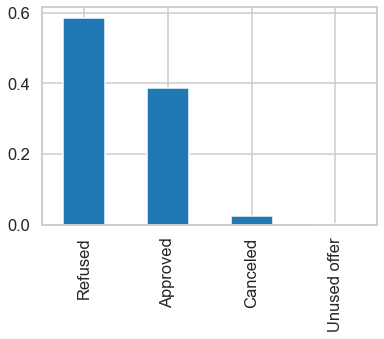

In [92]:
(previous_application.NAME_CONTRACT_STATUS.value_counts()/len(previous_application)).plot.bar()
plt.show()

### Merging application data and previous application data

making a left join because we need all the rows in application data 
by making this left join we get historical application data for each applicant.
if we made a inner join we would loose the data of a new customer who doesn't have a previous record.
Current data will get duplicated the exact number of times it is found in previous application data.
with this in mind we are moving forward.

In [93]:
merged_df=pd.merge(application_data,previous_application,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))

In [94]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Performing univariate analysis

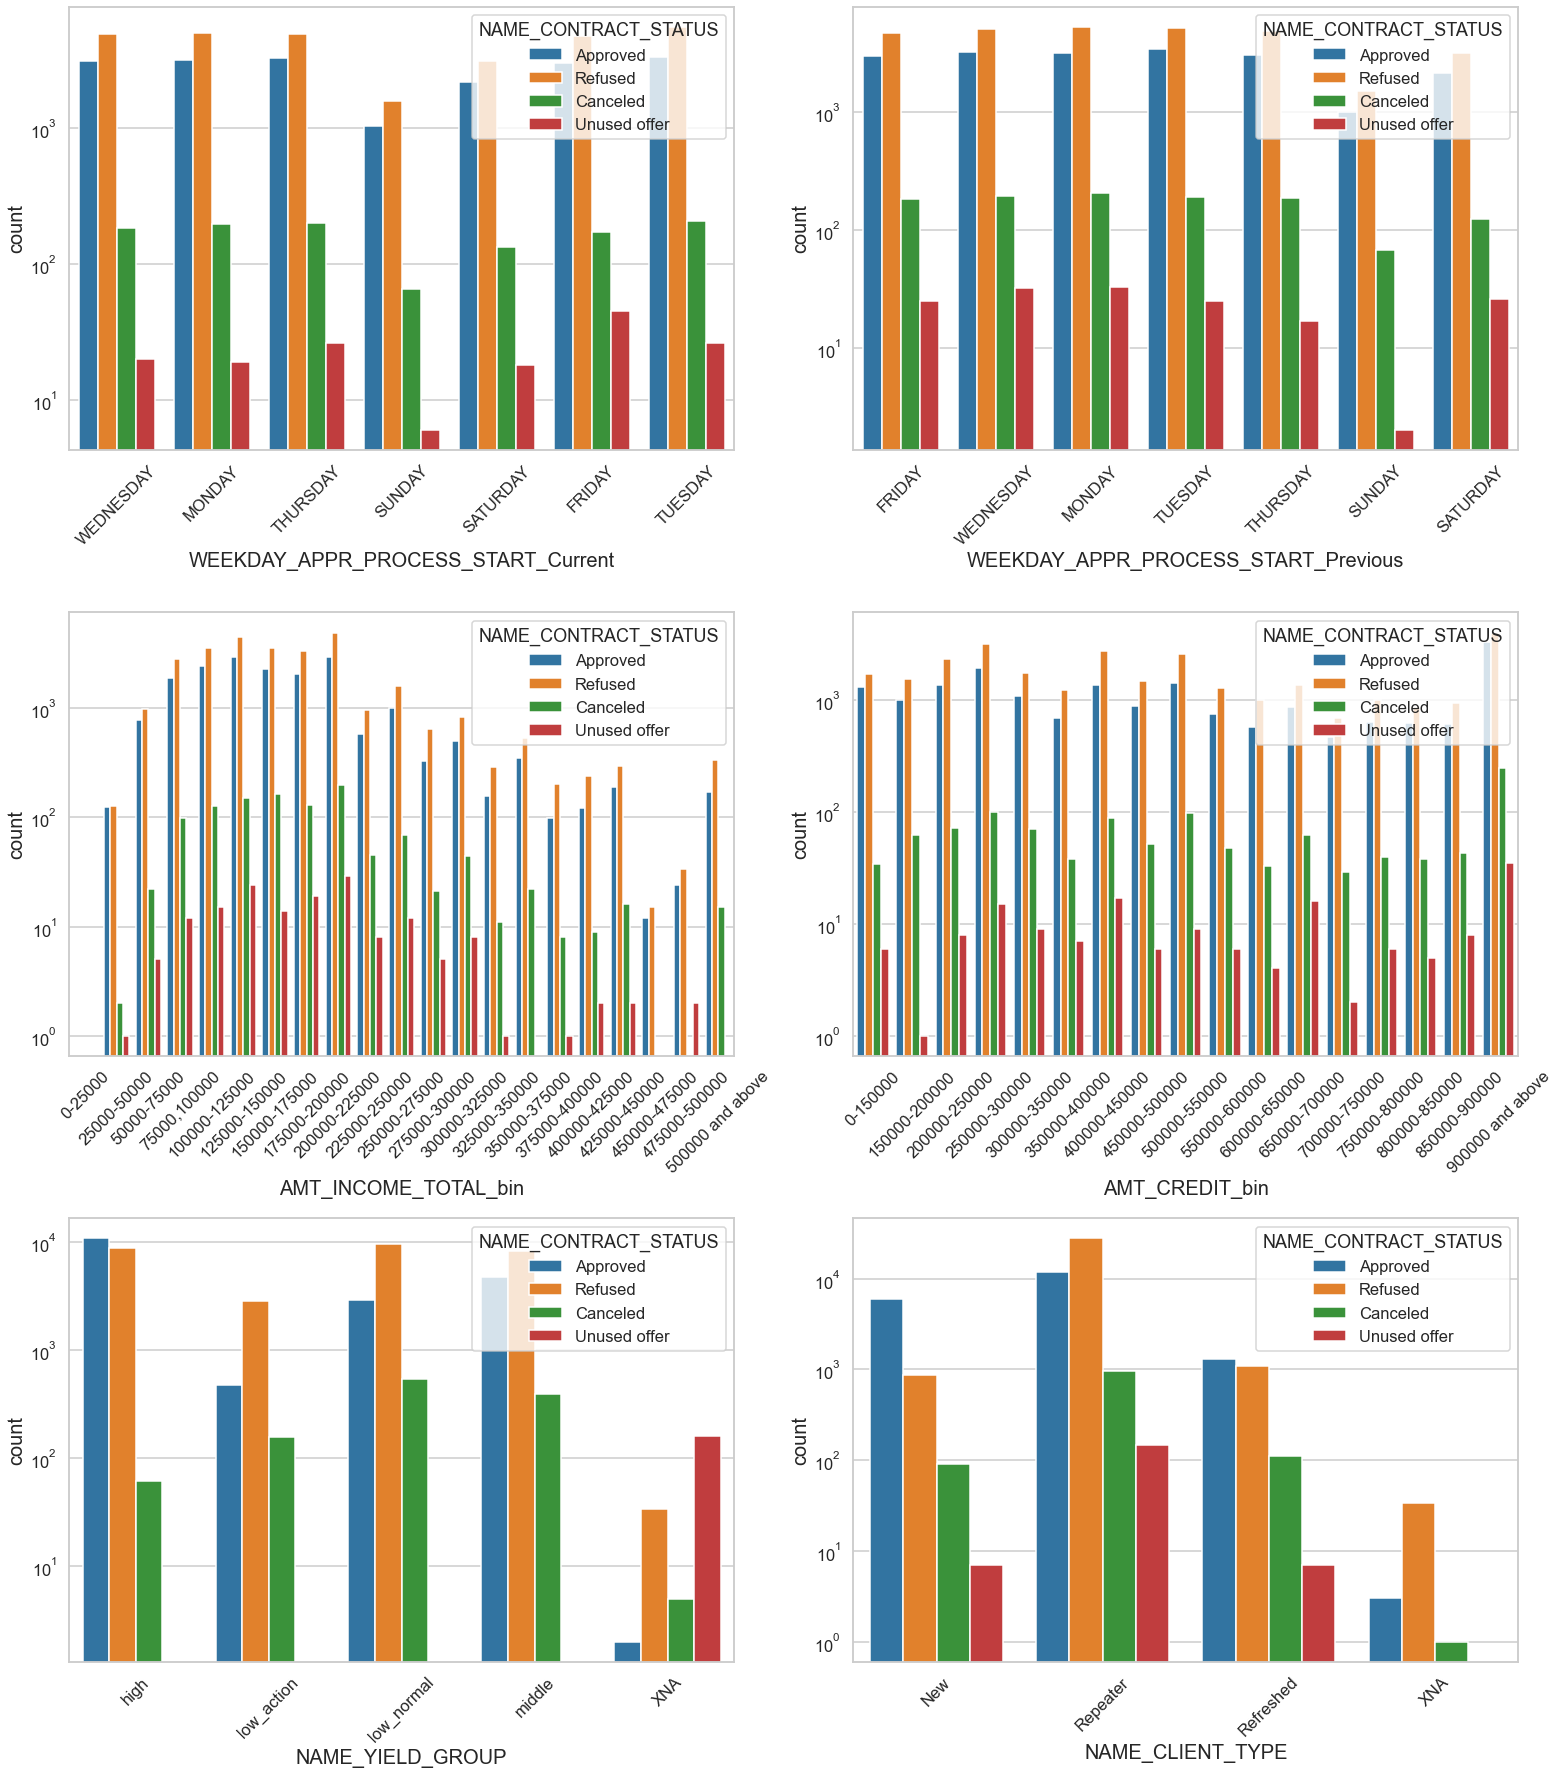

In [95]:
categorical_columns=['WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

    1.Repeater has highest number of approved loans.
    2.high NAME_YIELD_GROUP has highest approval.
    3.Value of AMT_CREDIT_BIN does not affect loan approvals.
    4.for 50000 to 200000 AMT_INCOME_TOTAL_bin the approval is highest .
    5.in previous application tuesday has the highest approval rate.

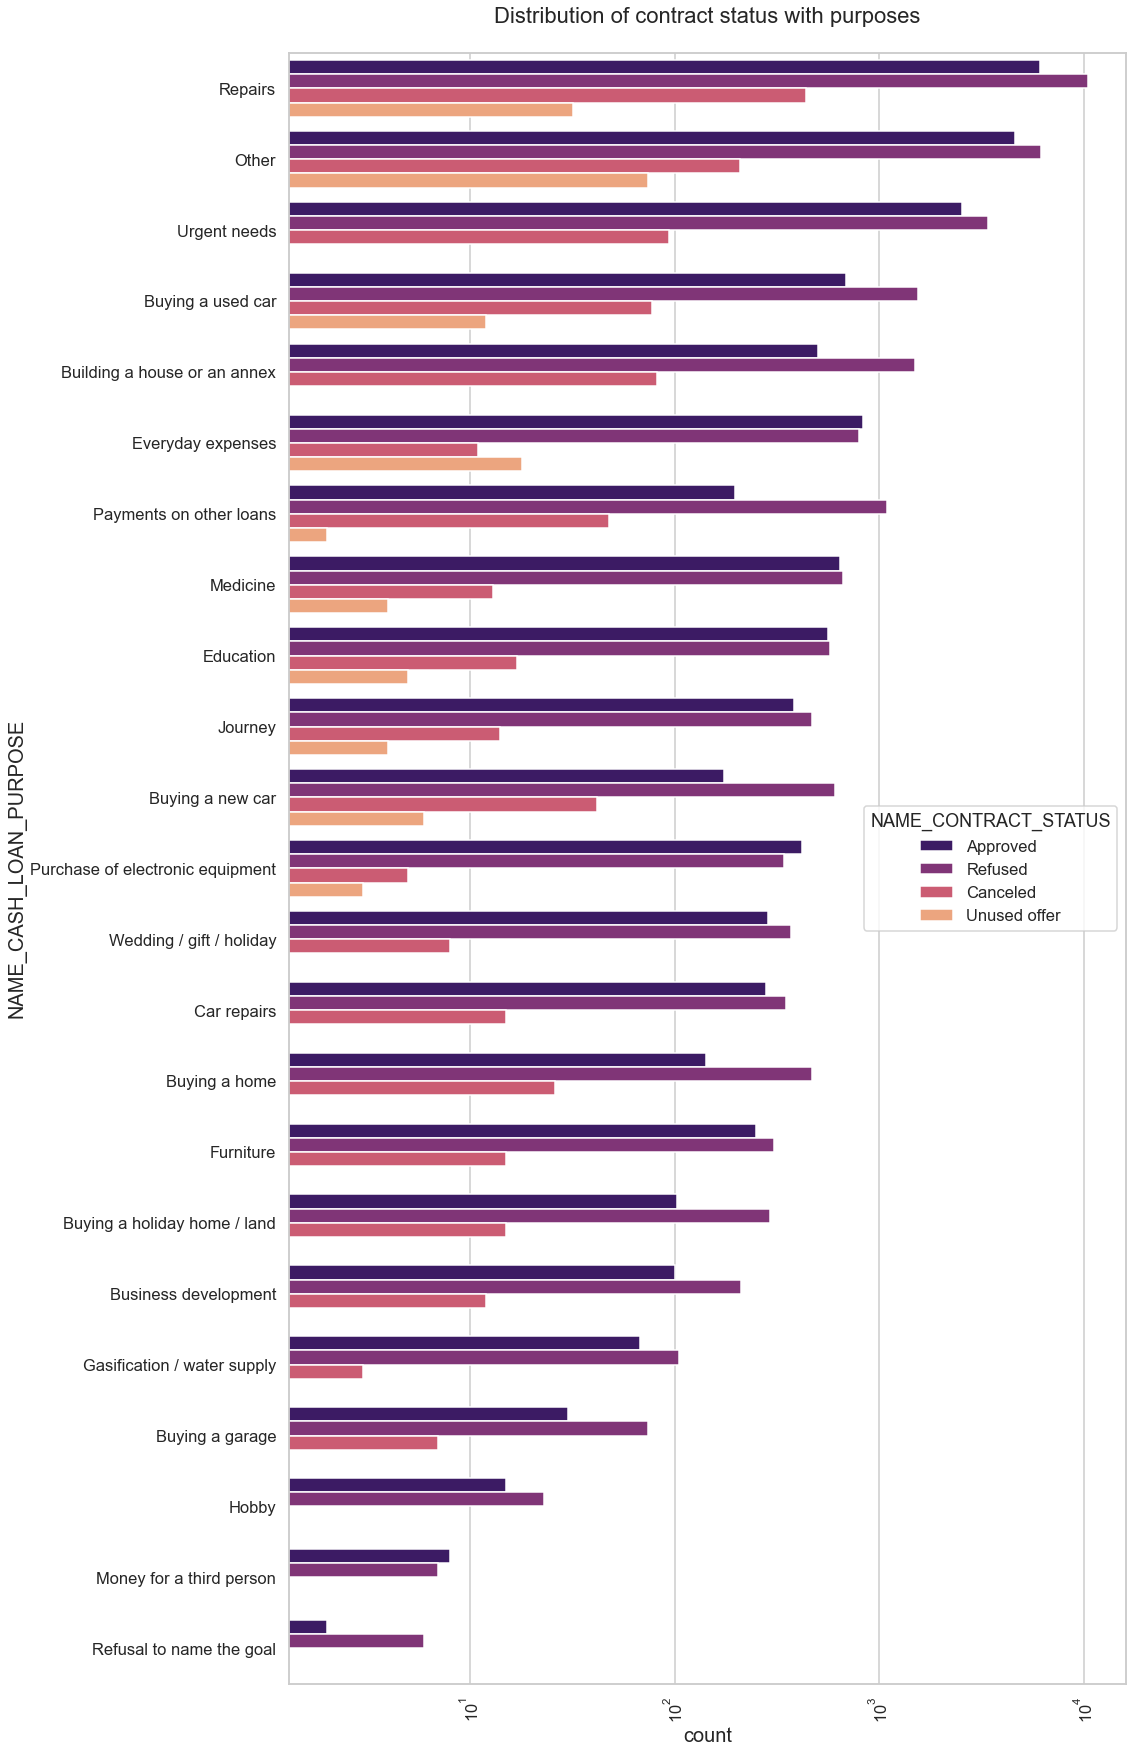

In [96]:
# Distribution of contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

    1.Most rejection of loans came from purpose 'repairs'.
    2.For education purposes we have almost equal number of approves and rejection
    3.Payign other loans, buying new home and buying a new car is having significant higher rejection than approves.

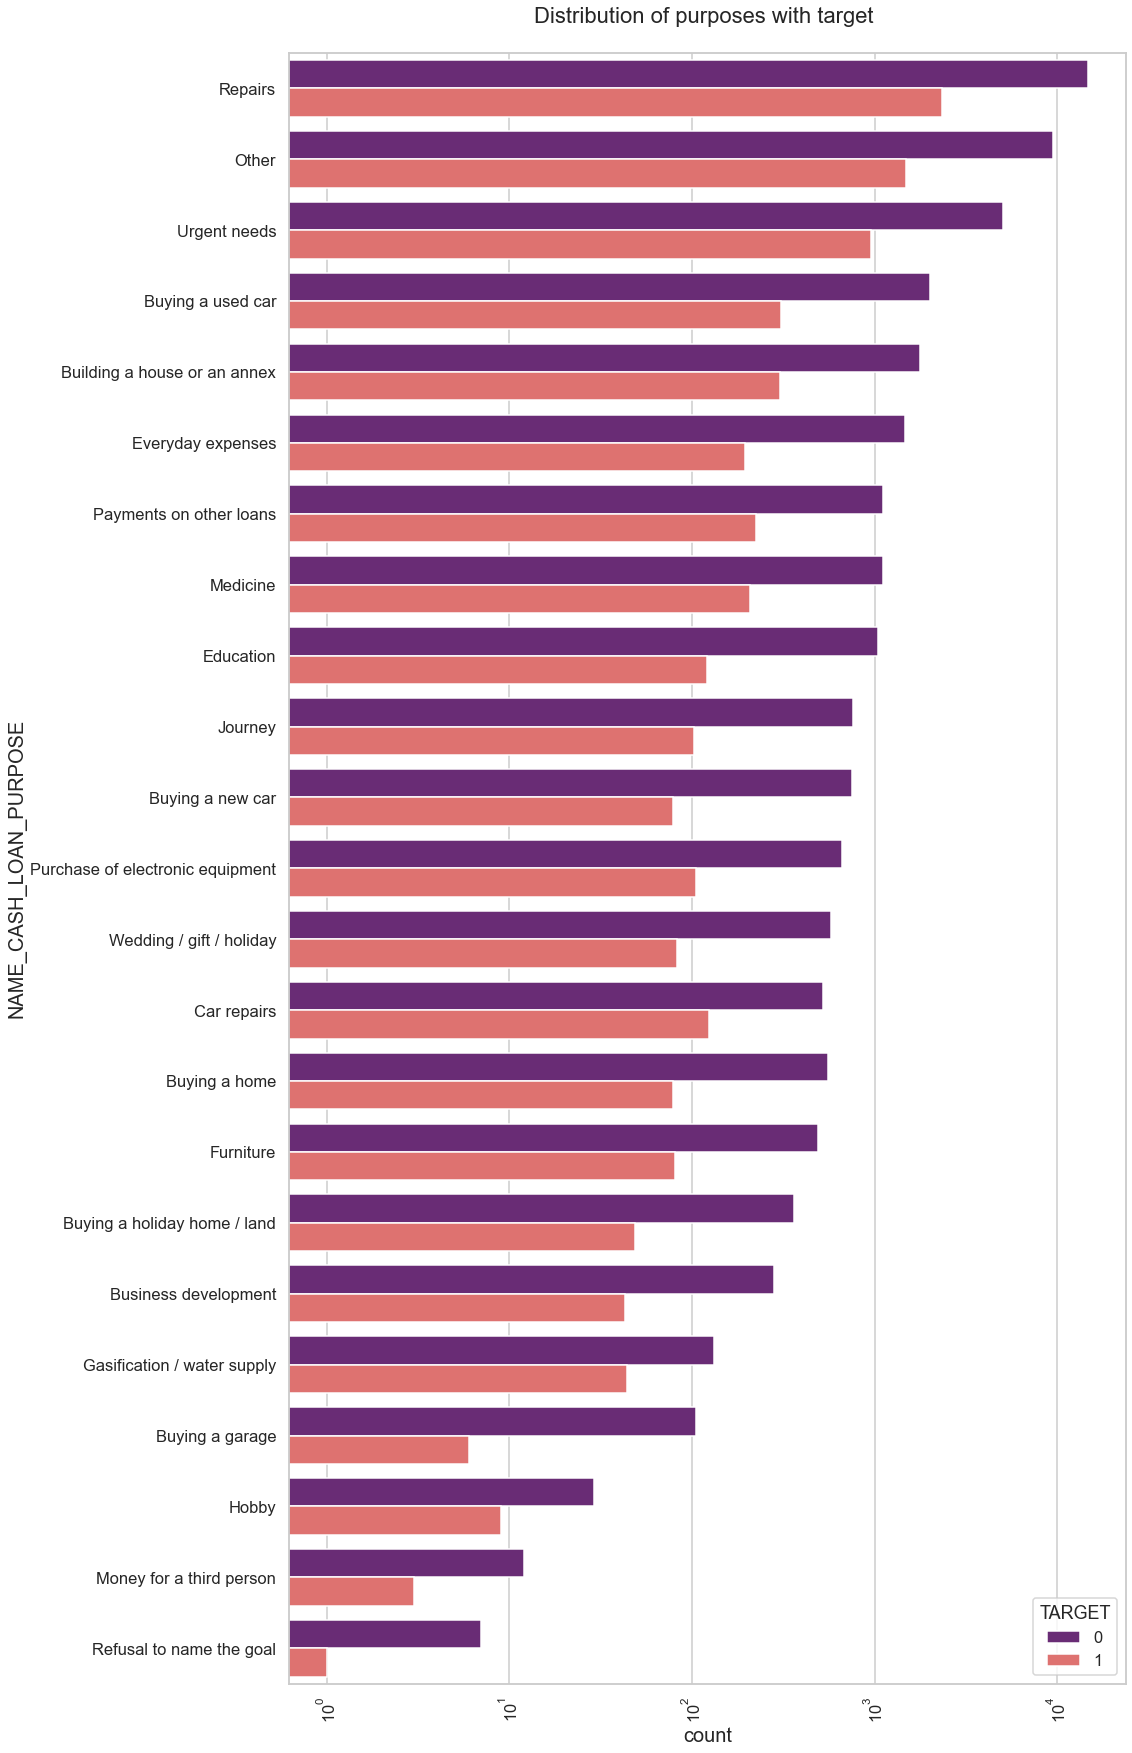

In [97]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

    1.Loan purposes with 'Repairs' are facing more difficulites in payment on time.
    2.here are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage','Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

### Performing bivariate analysis

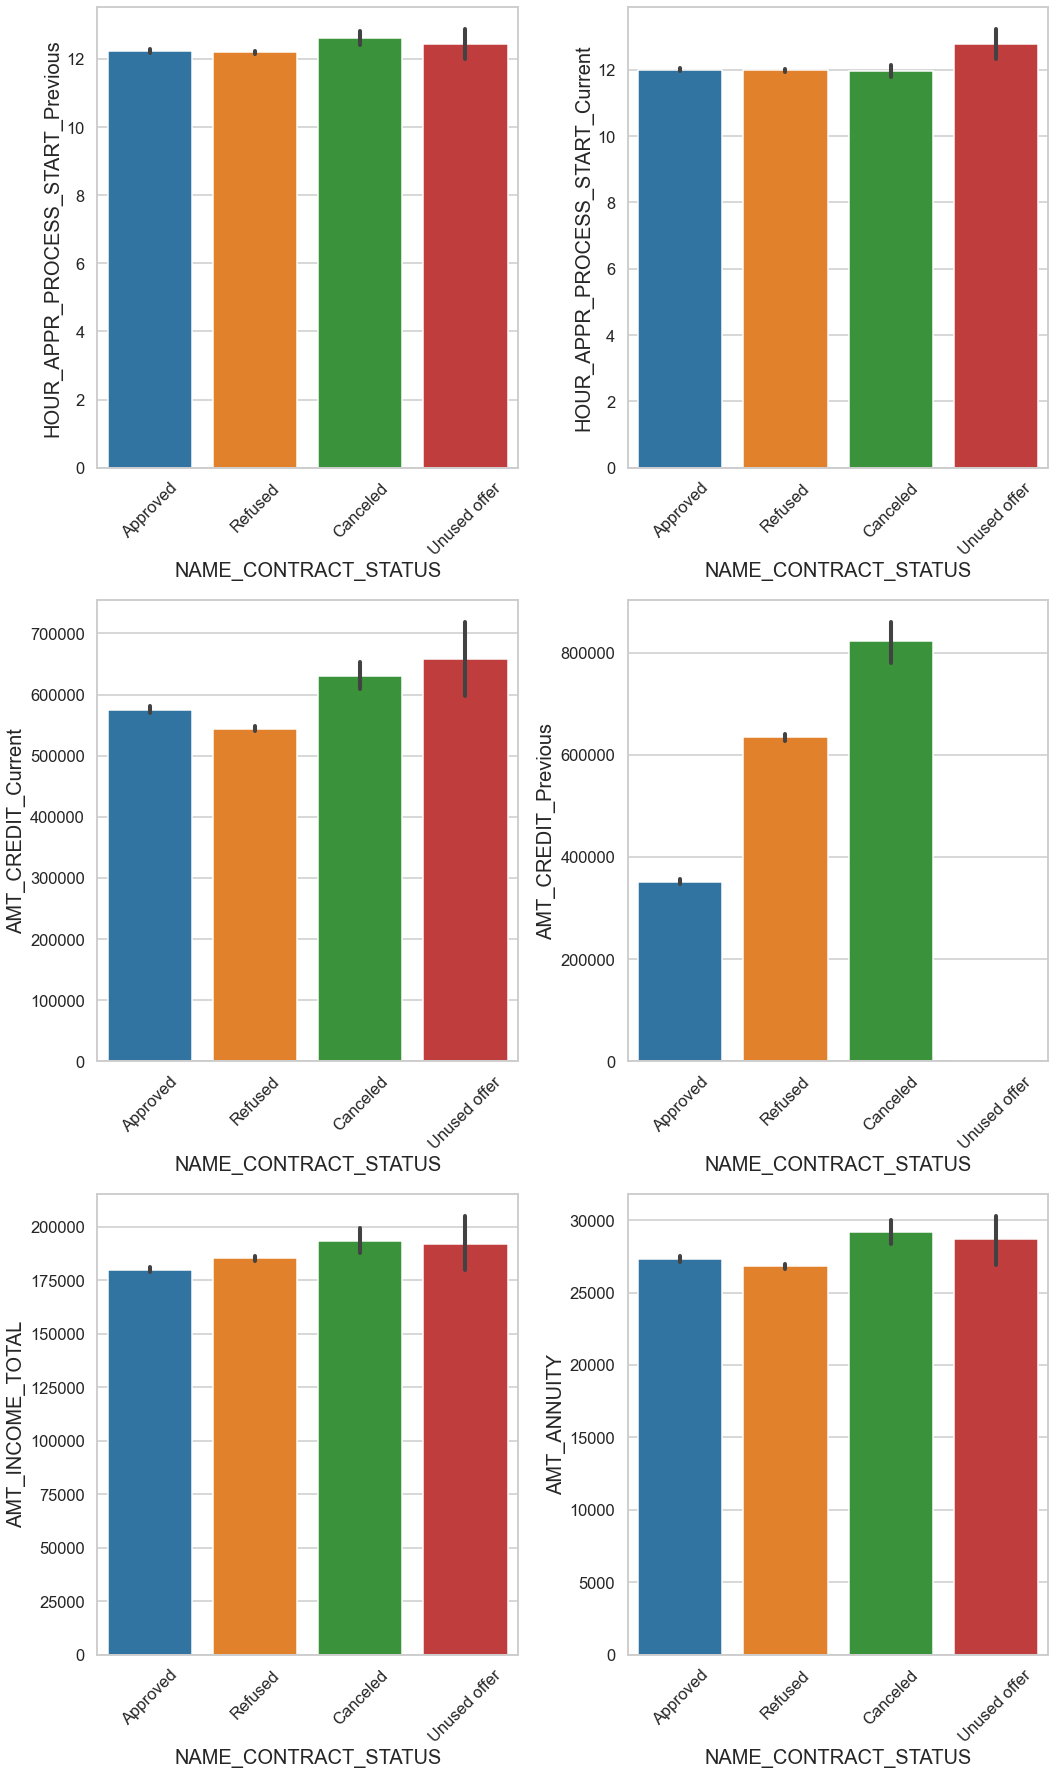

In [98]:
continous_columns=['HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous',
                   'AMT_INCOME_TOTAL','AMT_ANNUITY']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.barplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show() 

    1.time spent in unused offer is higher as compared to other categories.
    2.So bank should reduce time spent on unused offer.
    3.Previously most of the applications were cancelled or refused
    but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_ANNUITY.

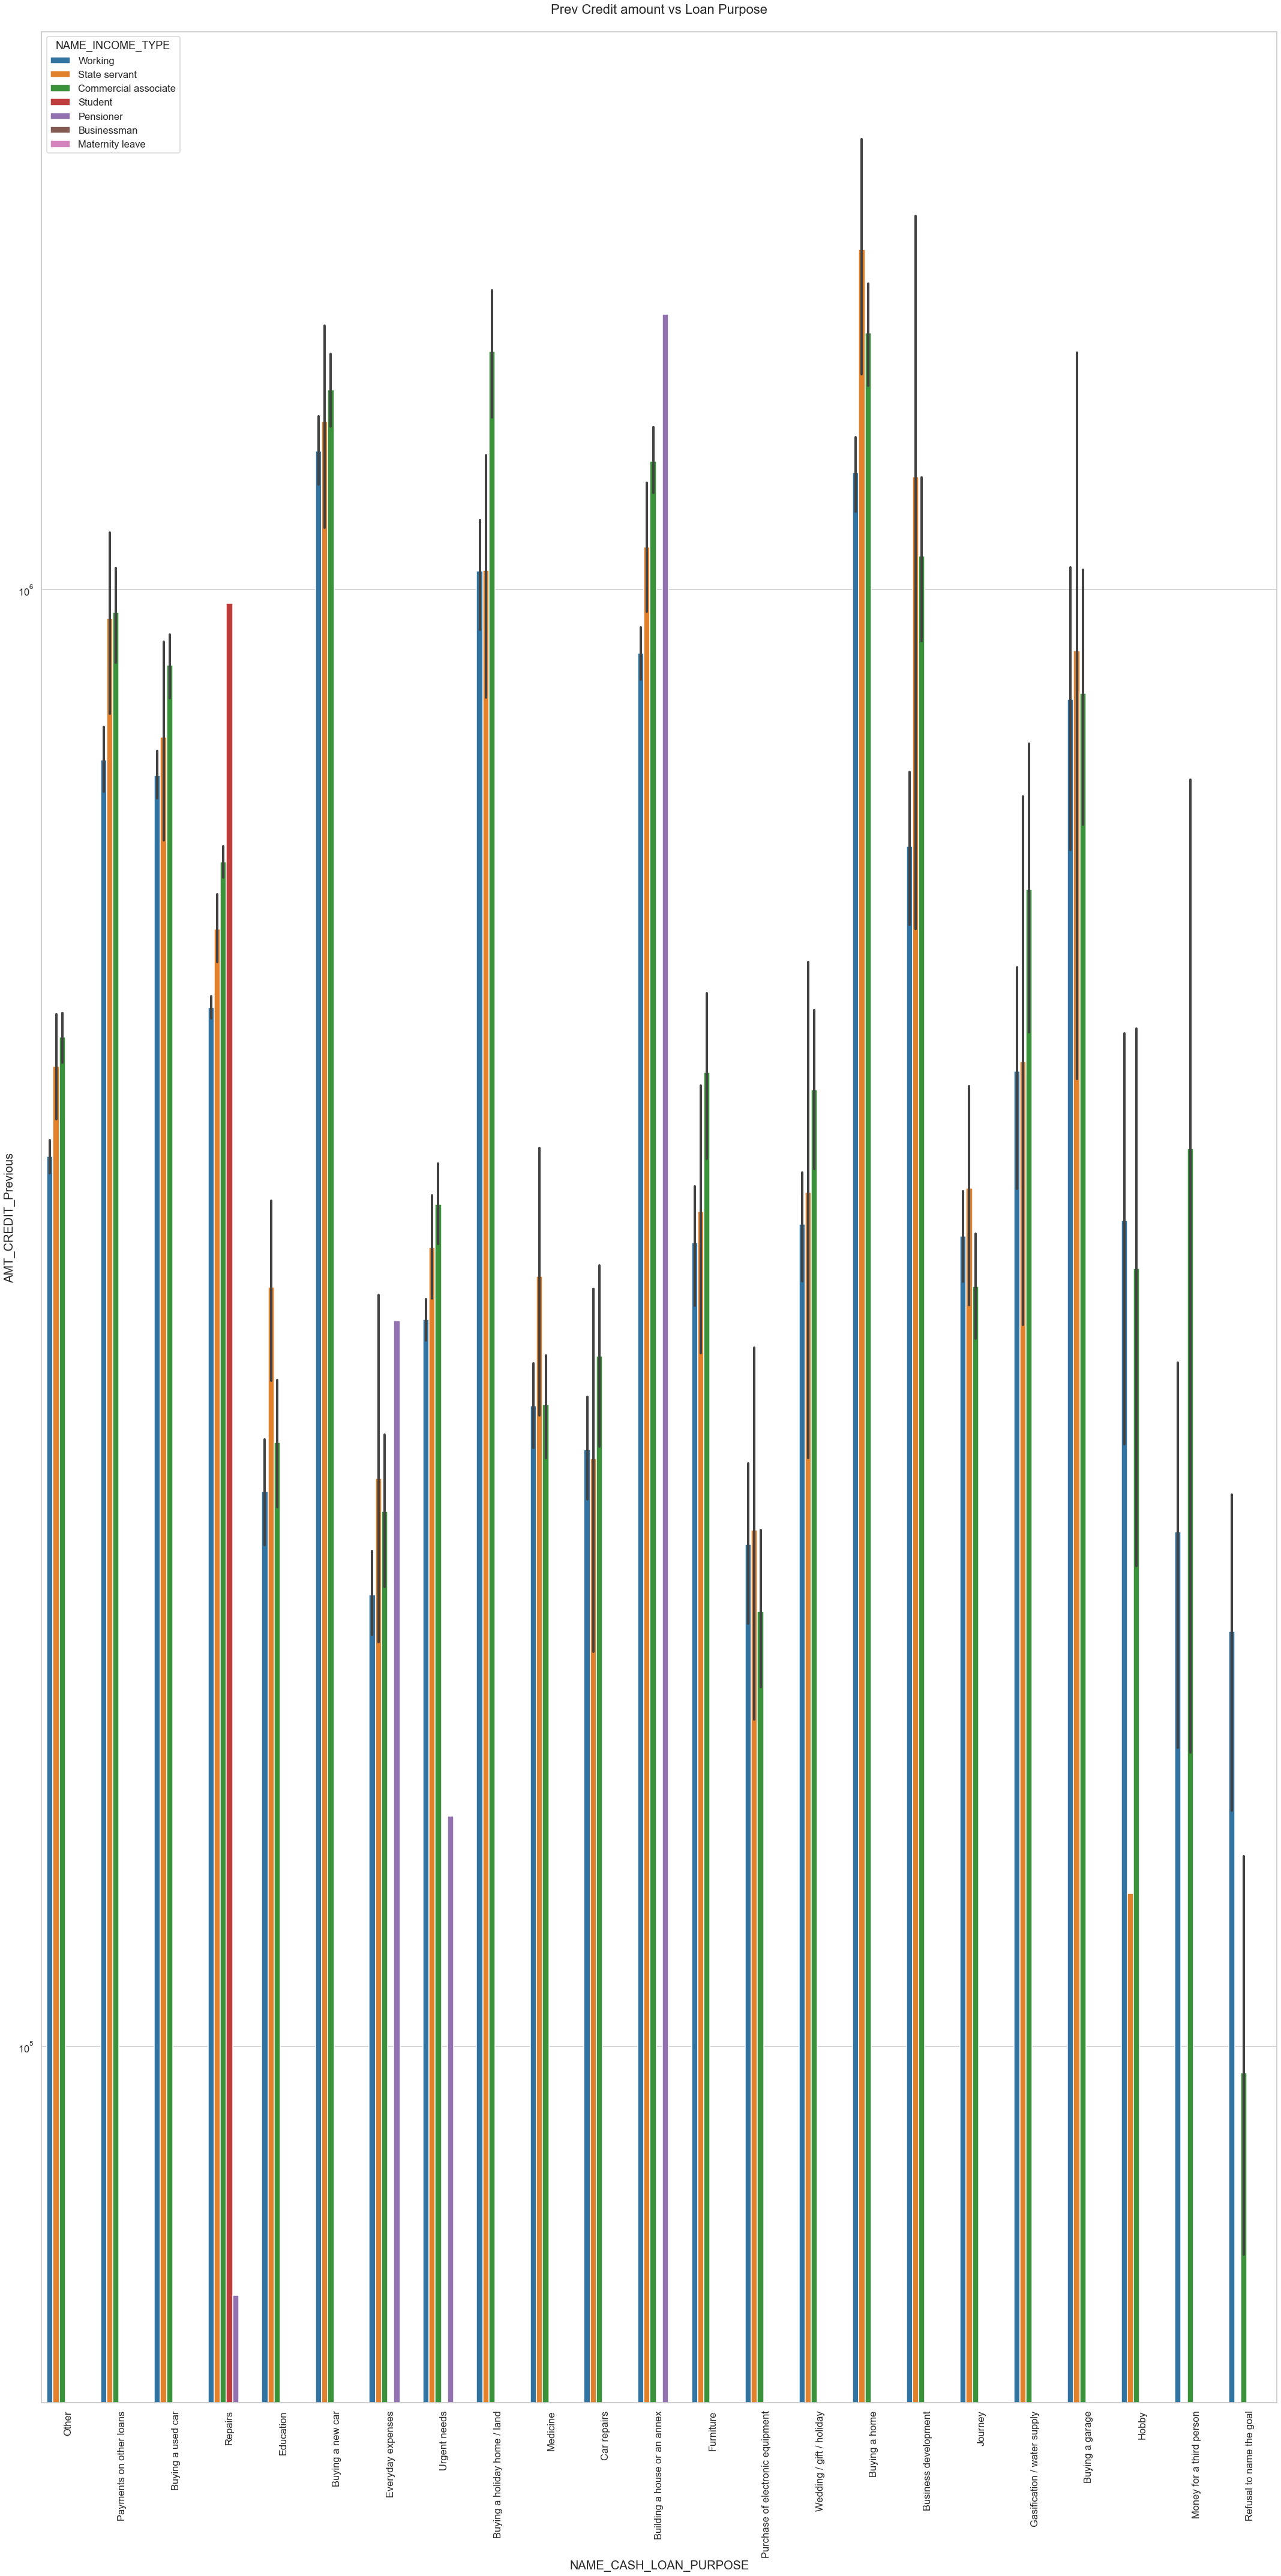

In [99]:
# Bar plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,60))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =merged_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_Previous',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.tight_layout()
plt.show()

    1.The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
    2.Income type of state servants have a significant amount of credit applied
    3.Money for third person or a Hobby is having less credits applied for.

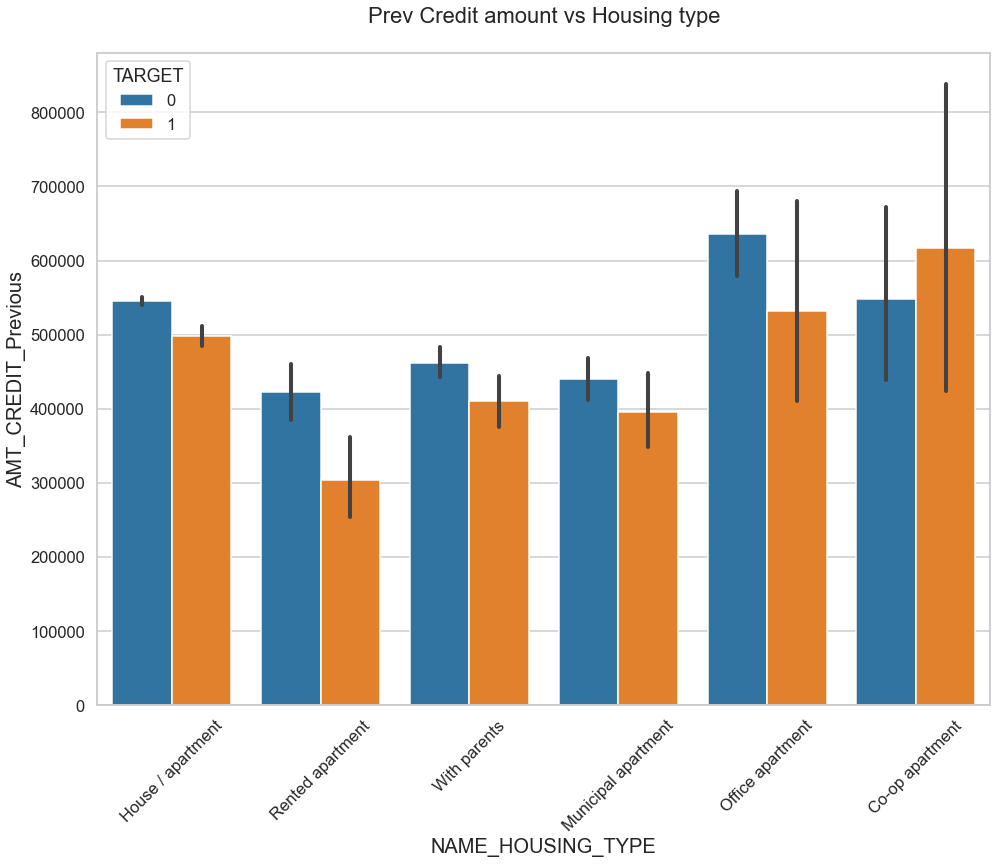

In [100]:
# Bar plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =merged_df, y='AMT_CREDIT_Previous',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office apartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\apartment or municipal apartment for successful payments.

## Recommended group where loan can be credited:-

   1. Client with High income

   2. Female client with higher education

   3. Client who's previous loan was approved 
   
   4. window who has unused previous loan status
   
   5. Refreshed client who has unused loan status previously

## Suggestions:-
    for minimize risk of loss consider these variables for loan approval:
    1)NAME_EDUCATION_TYPE
    2)AMT_INCOME_TOTAL
    3)AMT_CREDIT
    4)DAYS_EMPLOYED
    5)AMT_ANNUITY
    6)NAME_INCOME_TYPE
    8)CODE_GENDER
    7)NAME_HOUSING_TYPE